# Data Import and Cleaning:

Reading in the Data

In [1]:
# Load the necessary library for reading Excel files
library(readxl)

# Read the Excel file using read_excel function from readxl package
data <- read_excel("Patients Data ( Used for Heart Disease Prediction ).xlsx")

# Display the first few rows of the data
print(head(data))

# Display the structure of the data
print(str(data))

# A tibble: 6 × 35
  PatientID State   Sex    GeneralHealth AgeCategory  HeightInMeters
      <dbl> <chr>   <chr>  <chr>         <chr>                 <dbl>
1         1 Alabama Female Fair          Age 75 to 79           1.63
2         2 Alabama Female Very good     Age 65 to 69           1.60
3         3 Alabama Male   Excellent     Age 60 to 64           1.78
4         4 Alabama Male   Very good     Age 70 to 74           1.78
5         5 Alabama Female Good          Age 50 to 54           1.68
6         6 Alabama Male   Very good     Age 75 to 79           1.85
# ℹ 29 more variables: WeightInKilograms <dbl>, BMI <dbl>,
#   HadHeartAttack <dbl>, HadAngina <dbl>, HadStroke <dbl>, HadAsthma <dbl>,
#   HadSkinCancer <dbl>, HadCOPD <dbl>, HadDepressiveDisorder <dbl>,
#   HadKidneyDisease <dbl>, HadArthritis <dbl>, HadDiabetes <chr>,
#   DeafOrHardOfHearing <dbl>, BlindOrVisionDifficulty <dbl>,
#   DifficultyConcentrating <dbl>, DifficultyWalking <dbl>,
#   DifficultyDressingBathing <dbl>

Loading Necessary Libraries

In [2]:
library(caret)
library(car)
library(dplyr)
library(MASS)
library(ggplot2) 
library(broom)
library(tidyverse)

Loading required package: ggplot2

Loading required package: lattice

Loading required package: carData


Attaching package: ‘dplyr’


The following object is masked from ‘package:car’:

    recode


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
✔ readr     2.1.5     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ purrr::lift()   masks caret::lift()
✖ dplyr::recode() masks car::recode()
✖ MASS::select()  masks dplyr::select()
✖ purrr::some()   masks car::some()

## Converting Strings to Factors (Cleansing the Data)

In [3]:
data$State <- factor(data$State)
data$Sex <- factor(data$Sex)
data$GeneralHealth <- factor(data$GeneralHealth,c('Poor','Fair','Good','Very good','Excellent'))
data$AgeCategory <- factor(data$AgeCategory,c('Age 18 to 24','Age 25 to 29','Age 30 to 34','Age 35 to 39','Age 40 to 44','Age 45 to 49','Age 50 to 54','Age 55 to 59','Age 60 to 64','Age 65 to 69','Age 70 to 74','Age 75 to 79','Age 80 or older'))
data$HadHeartAttack <- factor(data$HadHeartAttack, levels = c(0,1),labels = c("No", "Yes"))
data$HadAngina <- factor(data$HadAngina, levels = c(0,1),labels = c("No", "Yes"))
data$HadStroke <- factor(data$HadStroke, levels = c(0,1),labels = c("No", "Yes"))
data$HadAsthma <- factor(data$HadAsthma, levels = c(0,1),labels = c("No", "Yes"))
data$HadSkinCancer <- factor(data$HadSkinCancer, levels = c(0,1),labels = c("No", "Yes"))
data$HadDepressiveDisorder <- factor(data$HadDepressiveDisorder, levels = c(0,1),labels = c("No", "Yes"))
data$HadKidneyDisease <- factor(data$HadKidneyDisease, levels = c(0,1),labels = c("No", "Yes"))
data$HadArthritis <- factor(data$HadArthritis, levels = c(0,1),labels = c("No", "Yes"))
data$HadDiabetes <- factor(data$HadDiabetes, levels = c('No','Yes, but only during pregnancy (female)','No, pre-diabetes or borderline diabetes','Yes'))
data$DeafOrHardOfHearing <- factor(data$DeafOrHardOfHearing, levels = c(0,1),labels = c("No", "Yes"))
data$BlindOrVisionDifficulty <- factor(data$BlindOrVisionDifficulty, levels = c(0,1),labels = c("No", "Yes"))
data$DifficultyConcentrating <- factor(data$DifficultyConcentrating, levels = c(0,1),labels = c("No", "Yes"))
data$HadCOPD <- factor(data$HadCOPD, levels = c(0,1),labels = c("No", "Yes"))
data$DifficultyWalking <- factor(data$DifficultyWalking, levels = c(0,1),labels = c("No", "Yes"))
data$DifficultyDressingBathing <- factor(data$DifficultyDressingBathing, levels = c(0,1),labels = c("No", "Yes"))
data$DifficultyErrands <- factor(data$DifficultyErrands, levels = c(0,1),labels = c("No", "Yes"))
data$SmokerStatus <- factor(data$SmokerStatus, levels = c('Never smoked','Former smoker','Current smoker - now smokes some days','Current smoker - now smokes every day'))
data$ECigaretteUsage <- factor(data$ECigaretteUsage, levels = c('Never used e-cigarettes in my entire life','Not at all (right now)','Use them some days','Use them every day'))
data$ChestScan <- factor(data$ChestScan, levels = c(0,1),labels = c("No", "Yes"))
data$RaceEthnicityCategory <- factor(data$RaceEthnicityCategory)
data$AlcoholDrinkers <- factor(data$AlcoholDrinkers, levels = c(0,1),labels = c("No", "Yes"))
data$HIVTesting <- factor(data$HIVTesting, levels = c(0,1),labels = c("No", "Yes"))
data$FluVaxLast12 <- factor(data$FluVaxLast12, levels = c(0,1),labels = c("No", "Yes"))
data$PneumoVaxEver <- factor(data$PneumoVaxEver, levels = c(0,1),labels = c("No", "Yes"))
data$TetanusLast10Tdap <- factor(data$TetanusLast10Tdap)
data$HighRiskLastYear <- factor(data$HighRiskLastYear, levels = c(0,1),labels = c("No", "Yes"))
data$CovidPos <- factor(data$CovidPos, levels = c(0,1),labels = c("No", "Yes"))

tail(data)

PatientID,State,Sex,GeneralHealth,AgeCategory,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,⋯,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
237625,Puerto Rico,Female,Poor,Age 70 to 74,1.52,45.81,19.73,No,No,⋯,Never used e-cigarettes in my entire life,No,Hispanic,No,Yes,No,No,"Yes, received tetanus shot but not sure what type",No,No
237626,Puerto Rico,Female,Good,Age 60 to 64,1.57,90.72,36.58,No,No,⋯,Not at all (right now),No,Hispanic,No,No,Yes,No,"No, did not receive any tetanus shot in the past 10 years",No,No
237627,Puerto Rico,Female,Good,Age 55 to 59,1.70,72.57,25.06,No,Yes,⋯,Not at all (right now),No,Hispanic,No,Yes,No,No,"Yes, received Tdap",No,No
237628,Puerto Rico,Male,Fair,Age 45 to 49,1.75,70.31,22.89,Yes,Yes,⋯,Not at all (right now),Yes,Hispanic,No,Yes,Yes,Yes,"Yes, received Tdap",Yes,No
237629,Puerto Rico,Female,Very good,Age 25 to 29,1.57,46.72,18.84,No,No,⋯,Never used e-cigarettes in my entire life,No,Hispanic,No,Yes,No,No,"No, did not receive any tetanus shot in the past 10 years",No,Yes
237630,Puerto Rico,Female,Good,Age 30 to 34,1.60,83.01,32.42,No,No,⋯,Never used e-cigarettes in my entire life,Yes,Hispanic,No,Yes,No,No,"No, did not receive any tetanus shot in the past 10 years",No,No


# Feature Engineering

Converting from states to regions for simplification, reduction of categories, and increasing sample size within each category for robust analysis. 

In [4]:
# Define state-to-region mapping
state_to_region <- list(
  Northeast = c("Connecticut", "Maine", "Massachusetts", "New Hampshire", "Rhode Island", "Vermont", 
                "New Jersey", "New York", "Pennsylvania"),
  Midwest = c("Illinois", "Indiana", "Iowa", "Kansas", "Michigan", "Minnesota", "Missouri", 
              "Nebraska", "North Dakota", "Ohio", "South Dakota", "Wisconsin"),
  South = c("Alabama", "Arkansas", "Delaware", "Florida", "Georgia", "Kentucky", "Louisiana", 
            "Maryland", "Mississippi", "North Carolina", "Oklahoma", "South Carolina", "Tennessee", 
            "Texas", "Virginia", "West Virginia", "District of Columbia"),
  West = c("Alaska", "Arizona", "California", "Colorado", "Hawaii", "Idaho", "Montana", "Nevada", 
           "New Mexico", "Oregon", "Utah", "Washington", "Wyoming"),
  Territories = c("Guam", "Puerto Rico", "Virgin Islands")
)

# Invert the mapping to create a lookup table
region_lookup <- unlist(lapply(names(state_to_region), function(region) {
  setNames(rep(region, length(state_to_region[[region]])), state_to_region[[region]])
}))

# Assign regions to customers
data$Region <- region_lookup[data$State]

# View a sample of the updated dataset
data$Region <- factor(data$Region)

## Data Splitting

Splitting the data into test and train data sets, removing the patient id and state column, and creating a centered and train and test set.

In [5]:
set.seed(123)

# Sample 70% of the rows
sample_rows <- sample(nrow(data), size = 0.7 * nrow(data))
sampled_data <- data[sample_rows,]
sampled_data <- sampled_data[, -c(1, 2)]

In [6]:
data2 <- data[, -c(1, 2)]
testdata <- data2[-sample_rows,]

In [7]:
preprocessing<-sampled_data %>% preProcess(method=c("center","scale"))
traintransformed<-preprocessing %>% predict(sampled_data)
testtransformed<-preprocessing %>% predict(testdata)

# Exploratory Data Analysis (EDA):

## Graphing variables to visualize relationships and gain preliminary insights into the data.

### Data Exploration Summary:
Observed differences in heart attack proportions by predictor:
- None: BMI, Height, Weight, State, Asthma, Depressive Disorder, Race, HIV Testing, FLU Vax, Tetnus Shot, Covid
- Moderate: Sex, Skin Cancer, Arthritis, Diabetes, Deaf, Blind, Difficulty Concentrating, Smoking, ECigarette, Chest Scan, Alcohol, Pneumo Vax, High Risk Last Year
- Substantial: General Health, Age, Angina, Stroke, COPD, Kidney Disease, Difficulty Walking, Difficulty Dressing, Errands Difficulty

In [10]:
library(tidyverse)

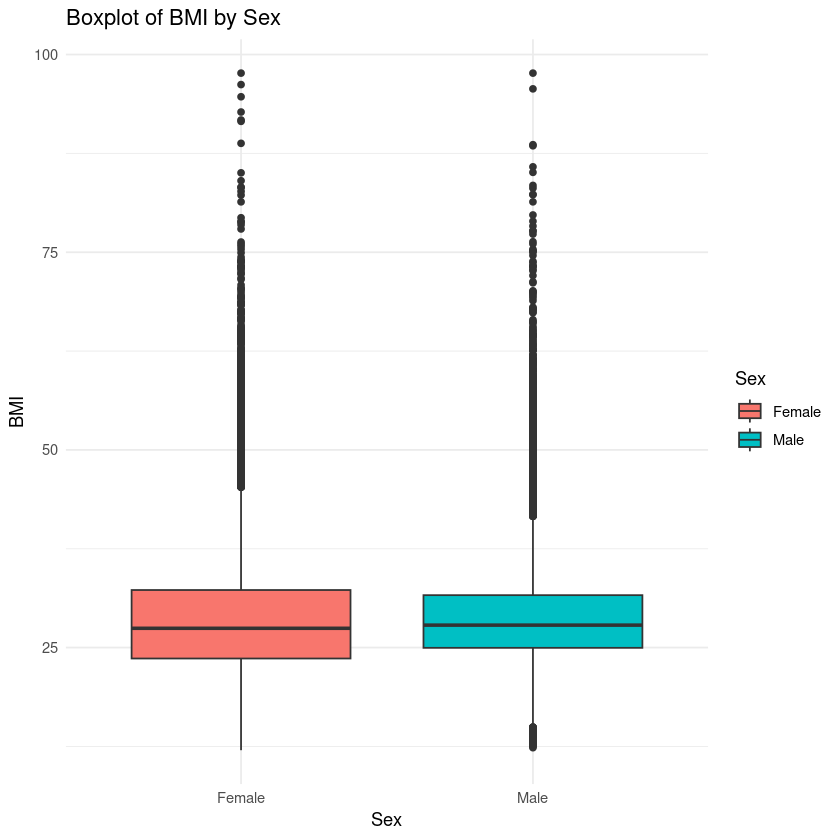

In [11]:
#Relationship between BMI and sex
ggplot(sampled_data, aes(x = Sex, y = BMI, fill = Sex)) +
  geom_boxplot() +
  labs(title = "Boxplot of BMI by Sex", x = "Sex", y = "BMI") +
  theme_minimal()

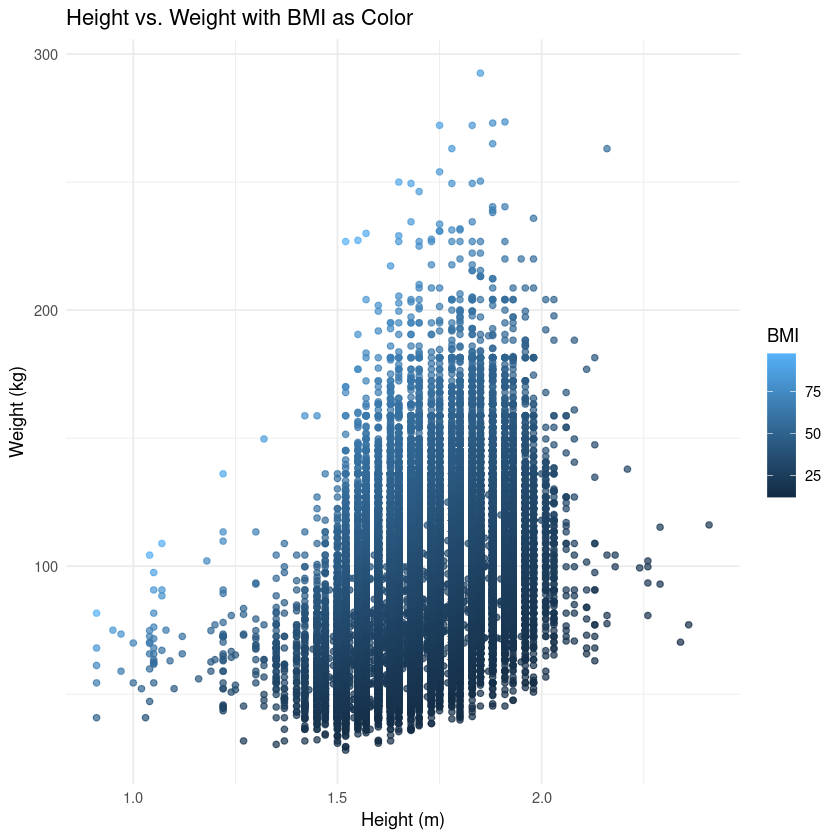

In [12]:
#Correlation between weight, height, and BMI 
ggplot(sampled_data, aes(x = HeightInMeters, y = WeightInKilograms)) +
  geom_point(aes(color = BMI), alpha = 0.7) +
  labs(title = "Height vs. Weight with BMI as Color", x = "Height (m)", y = "Weight (kg)") +
  theme_minimal()

## Weight, Height, and whether they had a heart attack or not
# this can help predict if the weight class is at jeapordy or at risk

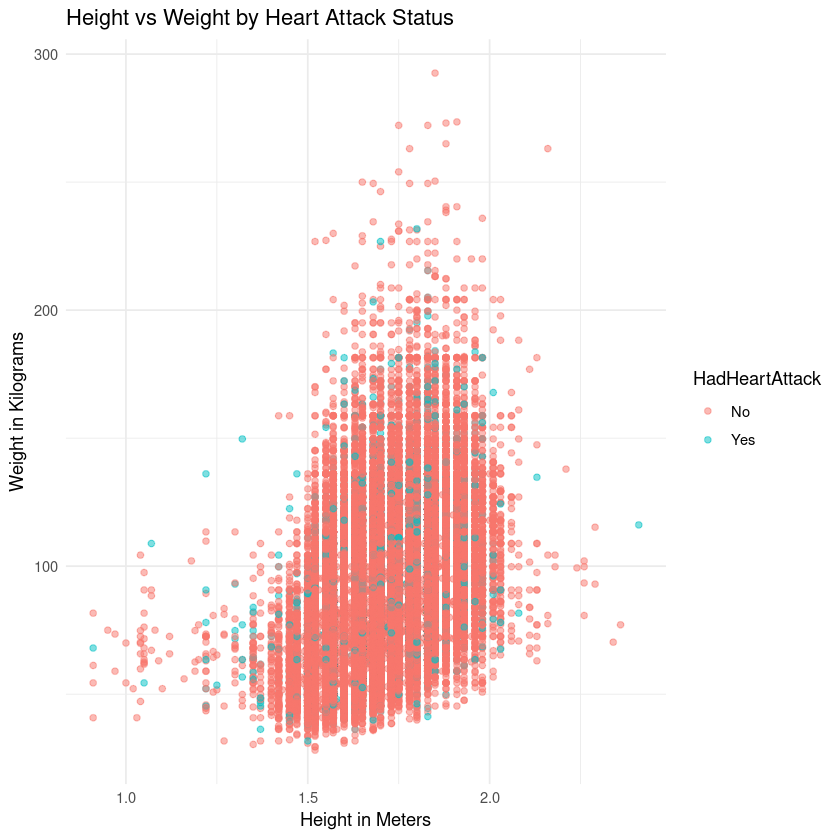

In [13]:
# Plotting height and weight against whether or not they had a heart attack
ggplot(sampled_data, aes(x = HeightInMeters, y = WeightInKilograms, color = HadHeartAttack)) +
  geom_point(alpha = 0.5) +
  theme_minimal() +
  labs(title = "Height vs Weight by Heart Attack Status",
       x = "Height in Meters",
       y = "Weight in Kilograms")
#Inturpretation: there is not a clear relationship between height, weight, and heart attack status. The individuals with heart attacks are scattered throughout.

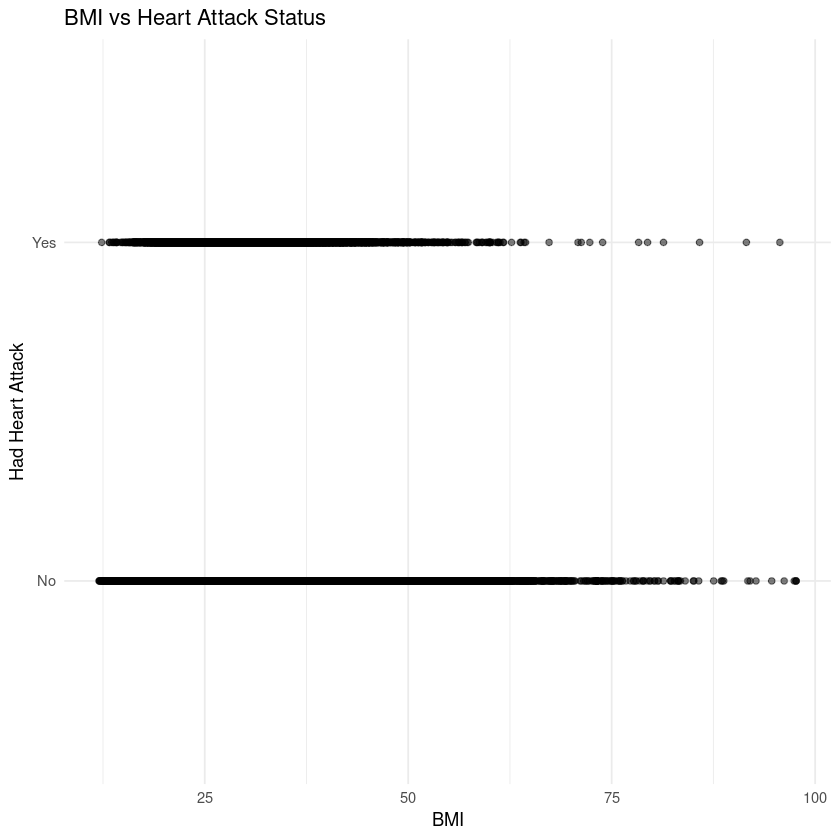

In [14]:
# BMI vs Heart Attack Status
ggplot(data, aes(x = BMI, y = HadHeartAttack)) +
  geom_point(alpha = 0.5) +
  theme_minimal() +
  labs(title = "BMI vs Heart Attack Status",
       x = "BMI",
       y = "Had Heart Attack")

#Interpretation: It does not look like there is a strong difference in whether someone will have a heart attack or not based on their BMI. Furthermore, this graph goes against initial intuition, showing people with higher BMI's potentially have less heart attacks.

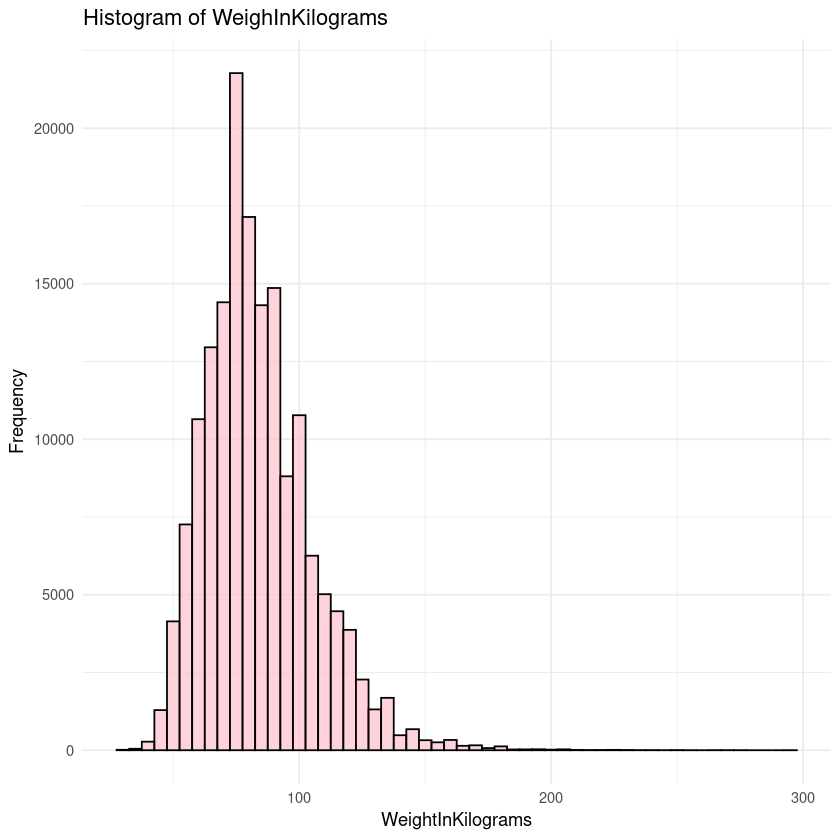

In [22]:
#Histograph of weight in kilograms
ggplot(sampled_data, aes(x = WeightInKilograms)) + 
    geom_histogram(binwidth = 5, fill = "pink", color = "black", alpha = 0.7) + 
    labs(title = "Histogram of WeighInKilograms",y="Frequency") + 
    theme_minimal()

Warning message in geom_bar(binwidth = 5, fill = "pink", color = "black", alpha = 0.7):
“Ignoring unknown parameters: `binwidth`”


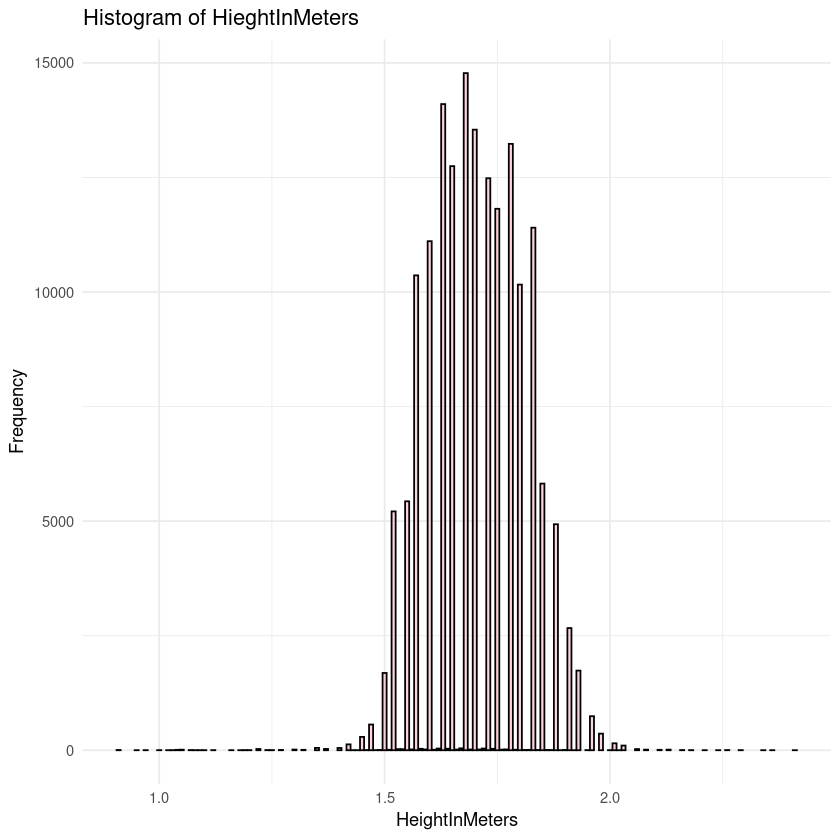

In [23]:
#bargraph of height in meters
ggplot(sampled_data, aes(x = HeightInMeters)) + 
    geom_bar(binwidth = 5, fill = "pink", color = "black", alpha = 0.7) + 
    labs(title = "Histogram of HieghtInMeters",y="Frequency") + 
    theme_minimal()

Warning message in geom_bar(binwidth = 5, fill = "pink", color = "black", alpha = 0.7):
“Ignoring unknown parameters: `binwidth`”


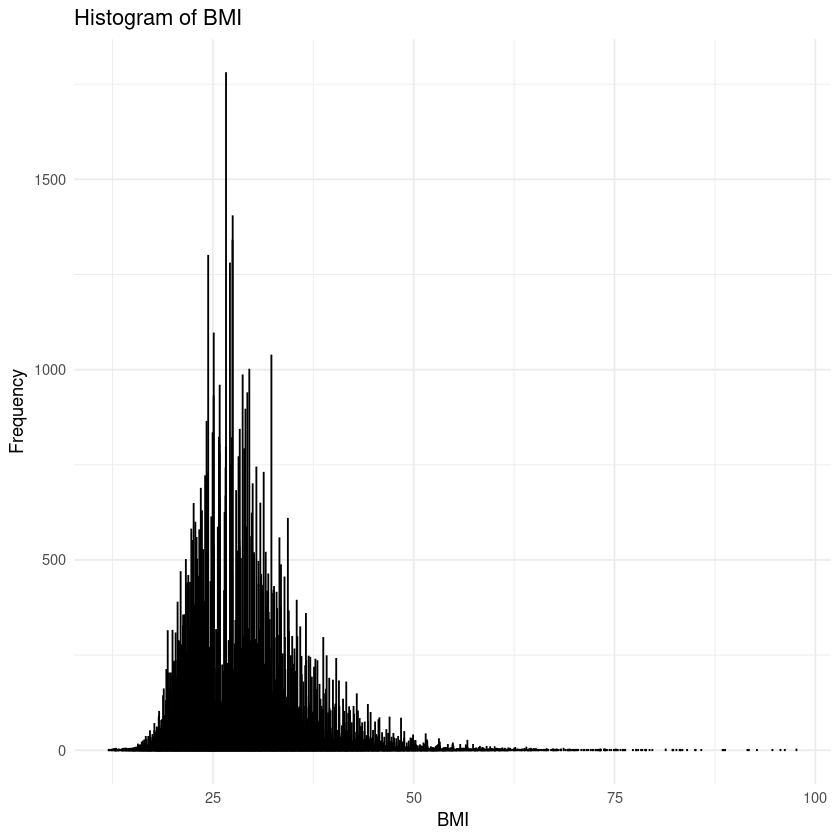

In [24]:
#histogram of BMI
ggplot(sampled_data, aes(x = BMI)) + 
    geom_bar(binwidth = 5, fill = "pink", color = "black", alpha = 0.7) + 
    labs(title = "Histogram of BMI",y="Frequency") + 
    theme_minimal()


Proportional Bar Graphs for All Categorical Variables:

             
                 No   Yes
  Midwest     49518  3092
  Northeast   29749  1680
  South       76212  4482
  Territories 10456   677
  West        58494  3270

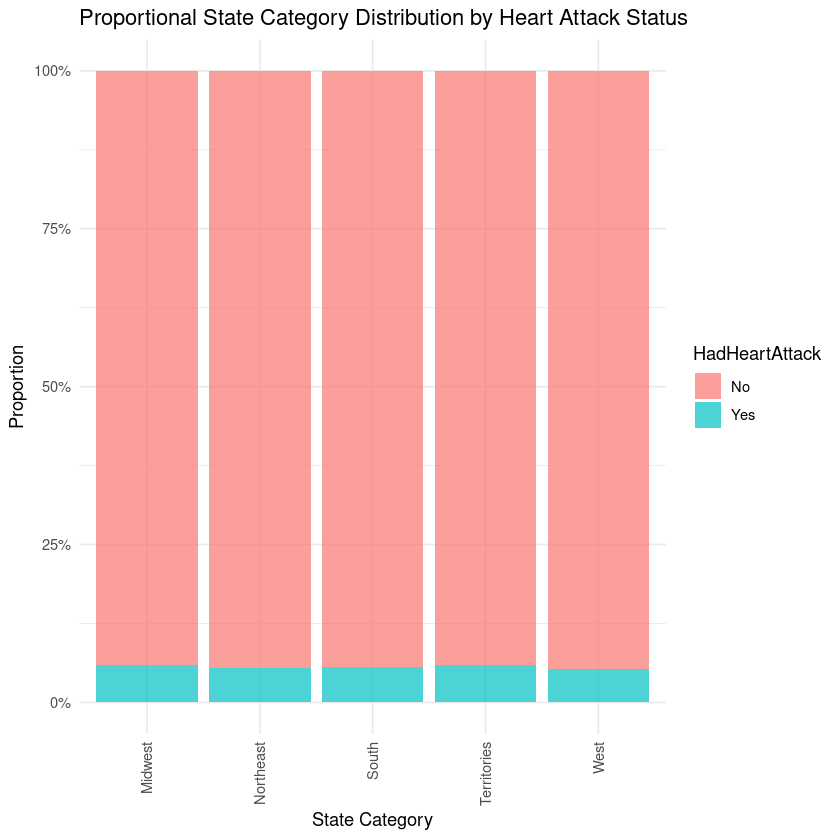

In [25]:
#Region
table(data$Region,data$HadHeartAttack)
ggplot(sampled_data, aes(x = Region, fill = HadHeartAttack)) + 
  geom_bar(position = "fill", alpha = 0.7) +
  labs(
    title = "Proportional State Category Distribution by Heart Attack Status", 
    x = "State Category", 
    y = "Proportion"
  ) +
  scale_y_continuous(labels = scales::percent_format()) +  # Converts y-axis to percentages
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5)  # Vertical and legible x-axis labels
  )
#Inturp: Not a clear relationship between state and heart attack status.

        
             No    Yes
  Female 118437   4856
  Male   105992   8345

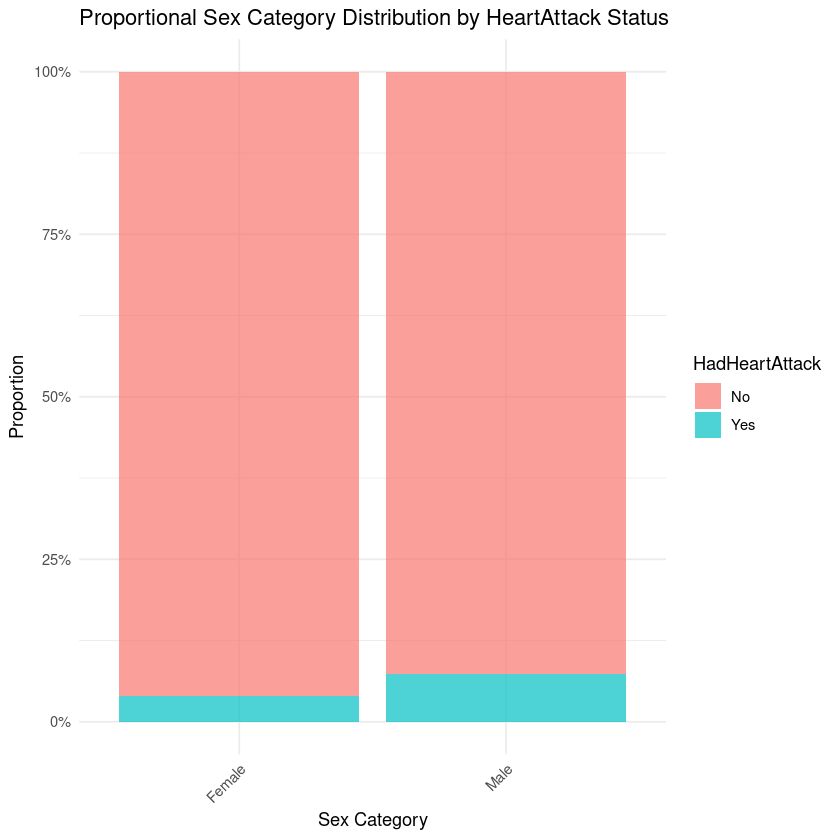

In [26]:
#Sex
table(data$Sex,data$HadHeartAttack)
ggplot(data, aes(x = Sex, fill = HadHeartAttack)) + 
  geom_bar(position = "fill", alpha = 0.7) +
  labs(
    title = "Proportional Sex Category Distribution by HeartAttack Status", 
    x = "Sex Category", 
    y = "Proportion"
  ) +
  scale_y_continuous(labels = scales::percent_format()) +  # Converts y-axis to percentages
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1)  # Adjusts x-axis label angle
  )
#Interp: Being a male may slightly increase heart attack chances.

           
               No   Yes
  Poor       7283  2001
  Fair      26260  3705
  Good      70451  4499
  Very good 81108  2412
  Excellent 39327   584

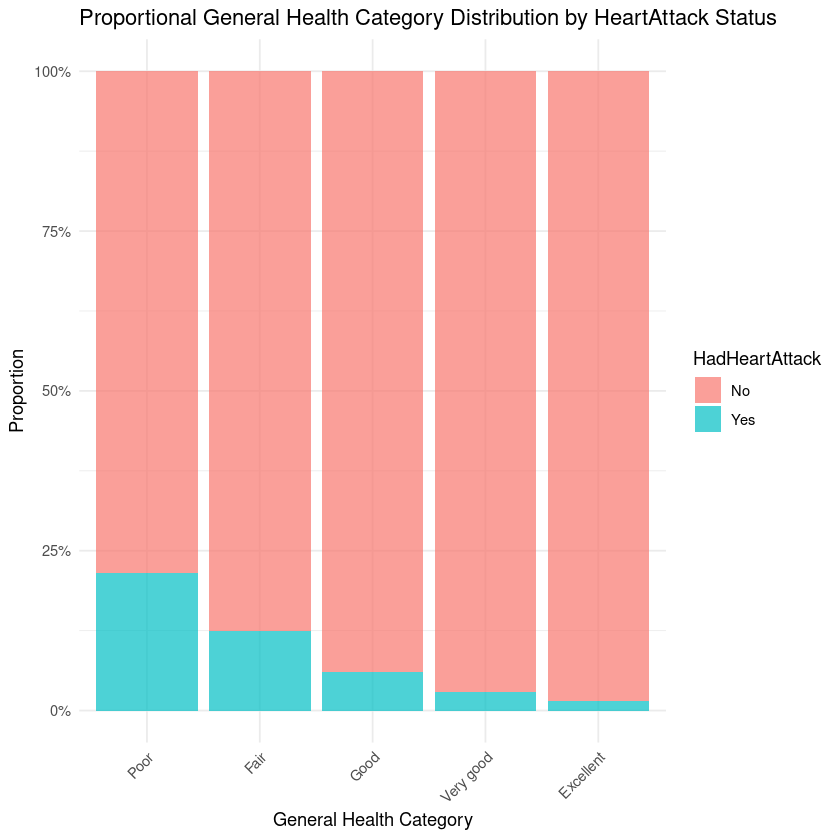

In [27]:
#GeneralHealth
table(data$GeneralHealth,data$HadHeartAttack)
ggplot(data, aes(x = GeneralHealth, fill = HadHeartAttack)) + 
  geom_bar(position = "fill", alpha = 0.7) +
  labs(
    title = "Proportional General Health Category Distribution by HeartAttack Status", 
    x = "General Health Category", 
    y = "Proportion"
  ) +
  scale_y_continuous(labels = scales::percent_format()) +  # Converts y-axis to percentages
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1)  # Adjusts x-axis label angle
  )
#Interp: Strong general health status may decrease heart attack chances.

                 
                     No   Yes
  Age 18 to 24    12727    50
  Age 25 to 29    10699    47
  Age 30 to 34    12735    90
  Age 35 to 39    14828   154
  Age 40 to 44    16004   224
  Age 45 to 49    15682   413
  Age 50 to 54    18465   689
  Age 55 to 59    20333  1089
  Age 60 to 64    24145  1540
  Age 65 to 69    25433  2114
  Age 70 to 74    22582  2364
  Age 75 to 79    15646  2033
  Age 80 or older 15150  2394

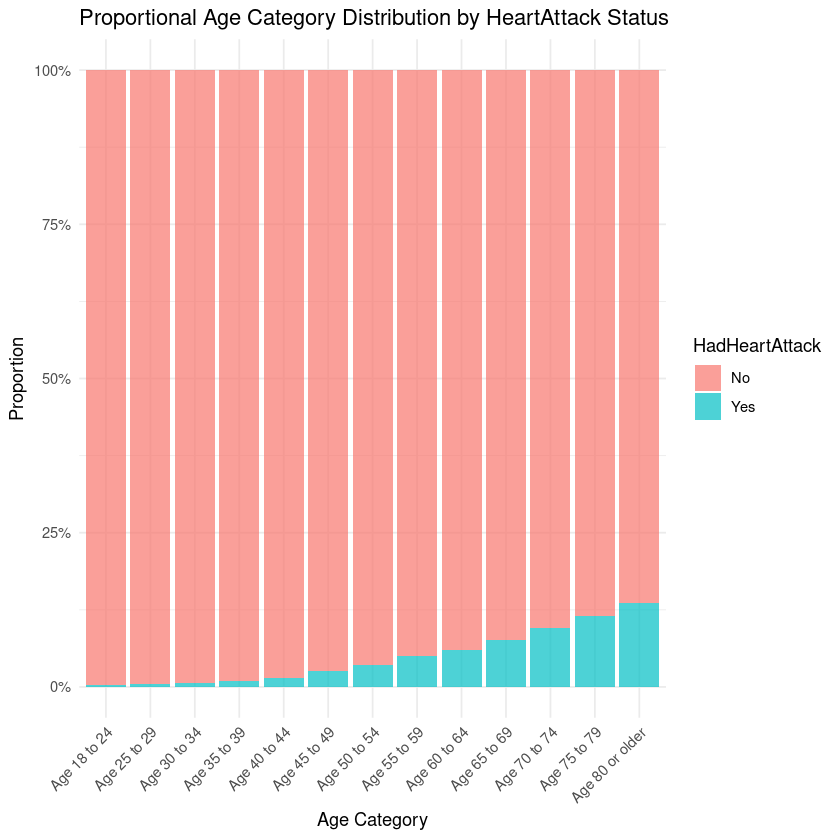

In [28]:
#Age
table(data$AgeCategory,data$HadHeartAttack)
ggplot(data, aes(x = AgeCategory, fill = HadHeartAttack)) + 
  geom_bar(position = "fill", alpha = 0.7) +
  labs(
    title = "Proportional Age Category Distribution by HeartAttack Status", 
    x = "Age Category", 
    y = "Proportion"
  ) +
  scale_y_continuous(labels = scales::percent_format()) +  # Converts y-axis to percentages
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1)  # Adjusts x-axis label angle
  )
#Interp: Older age may increase heart attack chances.

     
          No    Yes
  No  216463   6550
  Yes   7966   6651

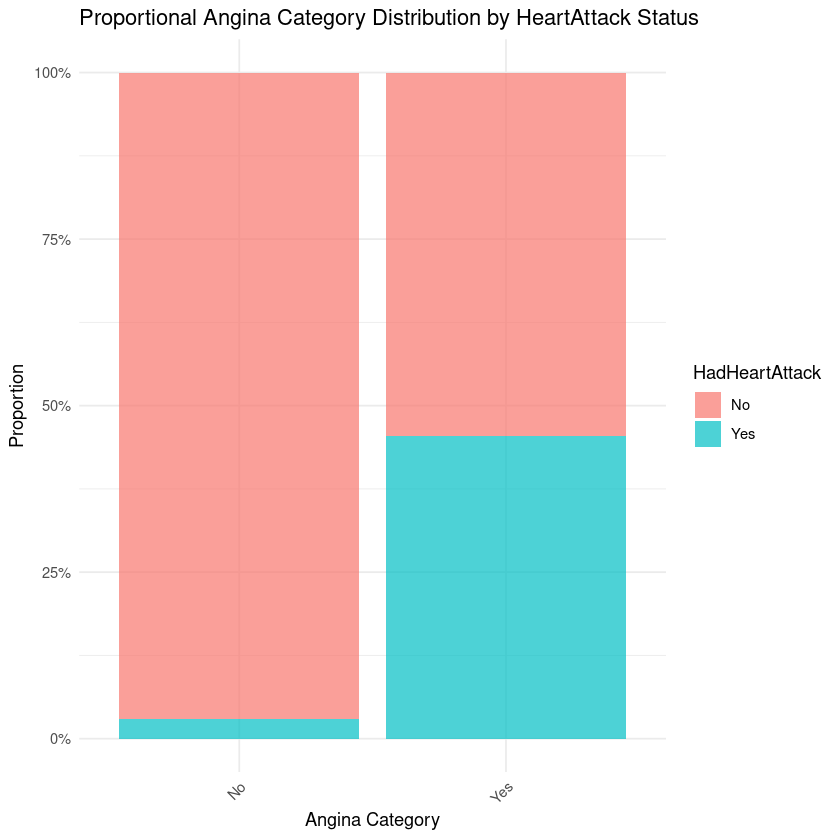

In [29]:
#Angina
table(data$HadAngina,data$HadHeartAttack)
ggplot(data, aes(x = HadAngina, fill = HadHeartAttack)) + 
  geom_bar(position = "fill", alpha = 0.7) +
  labs(
    title = "Proportional Angina Category Distribution by HeartAttack Status", 
    x = "Angina Category", 
    y = "Proportion"
  ) +
  scale_y_continuous(labels = scales::percent_format()) +  # Converts y-axis to percentages
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1)  # Adjusts x-axis label angle
  )
#Interp: Having angina may increase heart attack chances.

     
          No    Yes
  No  216988  10714
  Yes   7441   2487

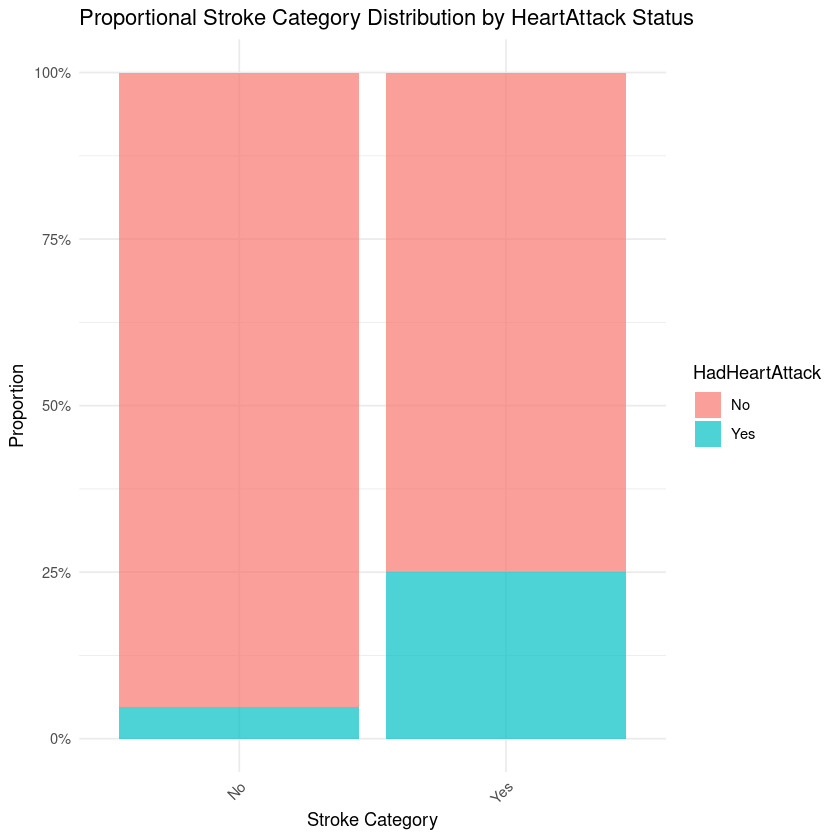

In [30]:
#Stroke
table(data$HadStroke,data$HadHeartAttack)
ggplot(data, aes(x = HadStroke, fill = HadHeartAttack)) + 
  geom_bar(position = "fill", alpha = 0.7) +
  labs(
    title = "Proportional Stroke Category Distribution by HeartAttack Status", 
    x = "Stroke Category", 
    y = "Proportion"
  ) +
  scale_y_continuous(labels = scales::percent_format()) +  # Converts y-axis to percentages
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1)  # Adjusts x-axis label angle
  )
#Interp: Having a stroke may increase heart attack chances.

     
          No    Yes
  No  191567  10771
  Yes  32862   2430

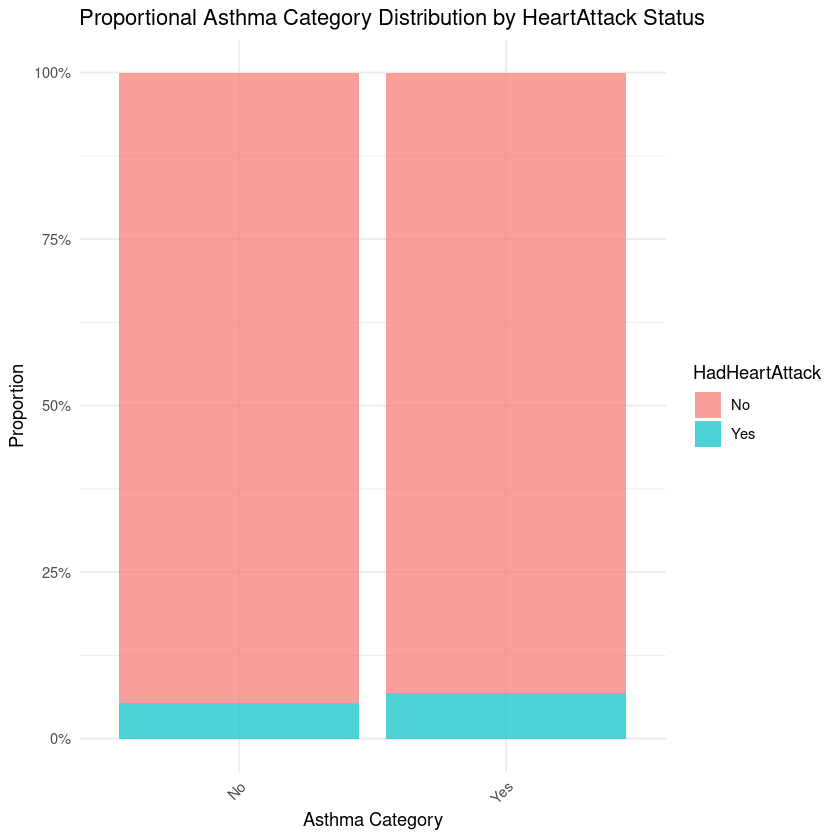

In [31]:
#Asthma
table(data$HadAsthma,data$HadHeartAttack)
ggplot(data, aes(x = HadAsthma, fill = HadHeartAttack)) + 
  geom_bar(position = "fill", alpha = 0.7) +
  labs(
    title = "Proportional Asthma Category Distribution by HeartAttack Status", 
    x = "Asthma Category", 
    y = "Proportion"
  ) +
  scale_y_continuous(labels = scales::percent_format()) +  # Converts y-axis to percentages
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1)  # Adjusts x-axis label angle
  )
#Interp: Having asthma may slighlty increase heart attack chances.

     
          No    Yes
  No  206055  11323
  Yes  18374   1878

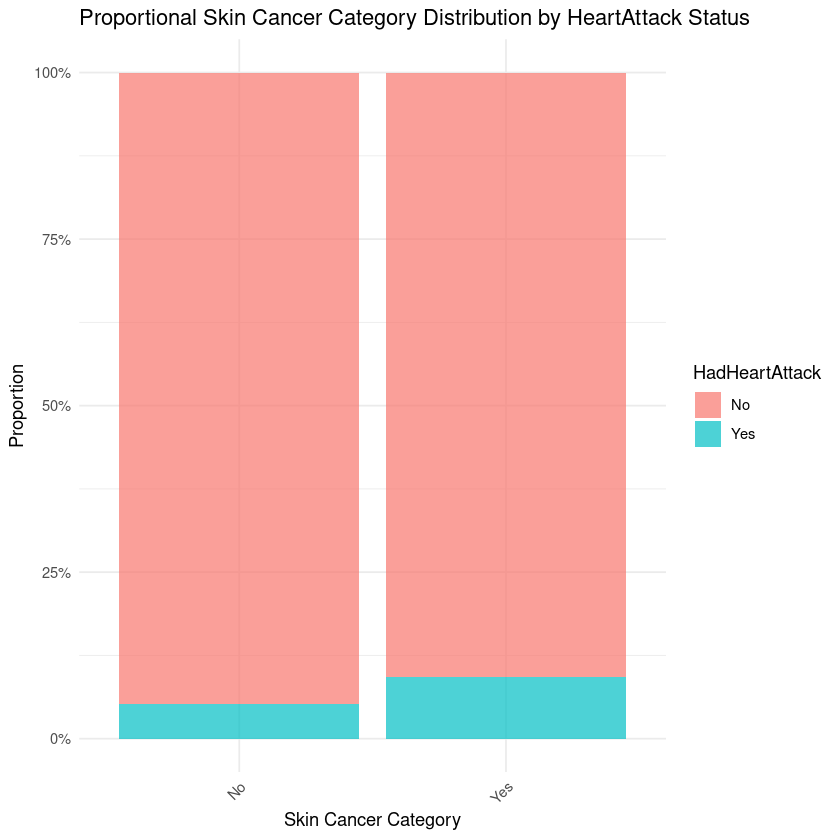

In [32]:
#Skin Cancer
table(data$HadSkinCancer,data$HadHeartAttack)
ggplot(data, aes(x = HadSkinCancer, fill = HadHeartAttack)) + 
  geom_bar(position = "fill", alpha = 0.7) +
  labs(
    title = "Proportional Skin Cancer Category Distribution by HeartAttack Status", 
    x = "Skin Cancer Category", 
    y = "Proportion"
  ) +
  scale_y_continuous(labels = scales::percent_format()) +  # Converts y-axis to percentages
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1)  # Adjusts x-axis label angle
  )
#Having skin cancer may slighlty increase heart attach chances.

     
          No    Yes
  No  208806  10222
  Yes  15623   2979

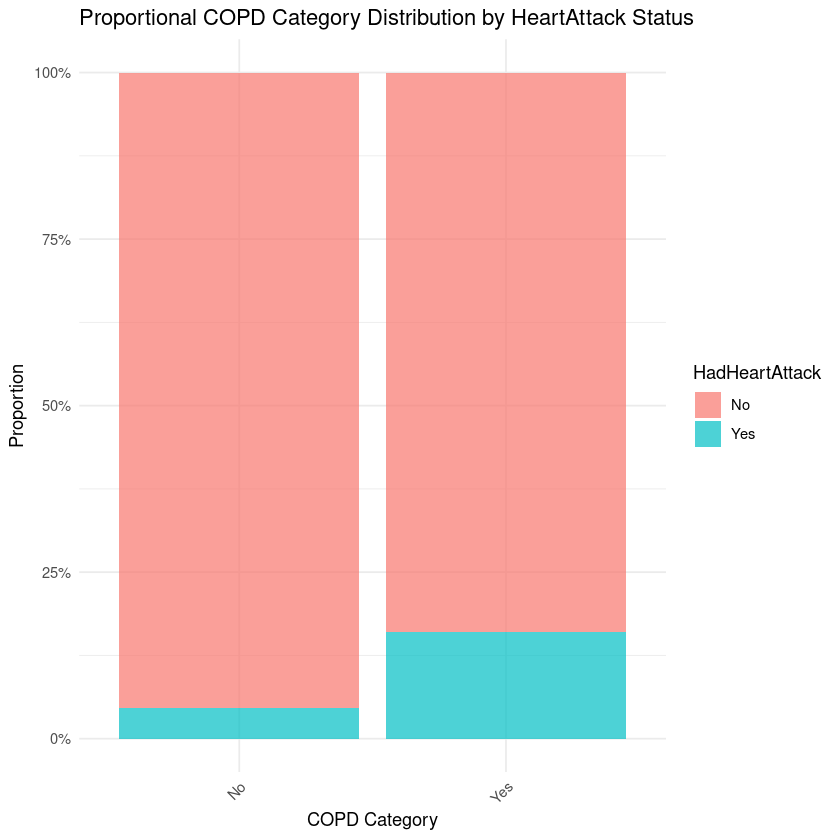

In [33]:
#COPD
table(data$HadCOPD,data$HadHeartAttack)
ggplot(data, aes(x = HadCOPD, fill = HadHeartAttack)) + 
  geom_bar(position = "fill", alpha = 0.7) +
  labs(
    title = "Proportional COPD Category Distribution by HeartAttack Status", 
    x = "COPD Category", 
    y = "Proportion"
  ) +
  scale_y_continuous(labels = scales::percent_format()) +  # Converts y-axis to percentages
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1)  # Adjusts x-axis label angle
  )
#Having COPD may increase Heart Attack chances.

     
          No    Yes
  No  178777   9957
  Yes  45652   3244

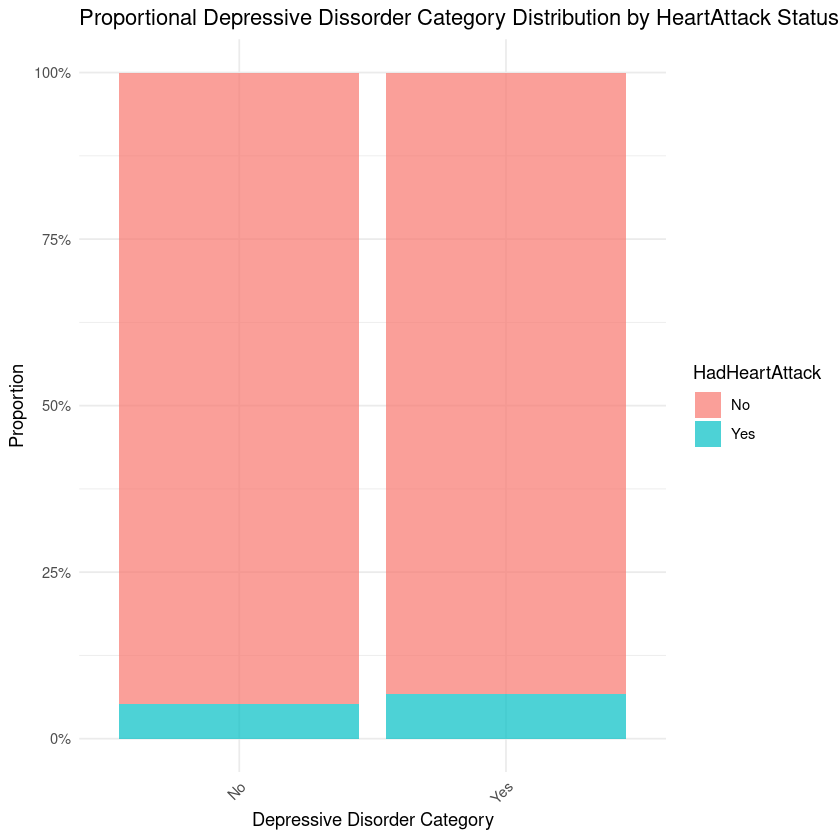

In [34]:
#Depressive Dissorder
table(data$HadDepressiveDisorder,data$HadHeartAttack)
ggplot(data, aes(x = HadDepressiveDisorder, fill = HadHeartAttack)) + 
  geom_bar(position = "fill", alpha = 0.7) +
  labs(
    title = "Proportional Depressive Dissorder Category Distribution by HeartAttack Status", 
    x = "Depressive Disorder Category", 
    y = "Proportion"
  ) +
  scale_y_continuous(labels = scales::percent_format()) +  # Converts y-axis to percentages
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1)  # Adjusts x-axis label angle
  )
#Interp: having a depressive dissorder may slighlty increase Heart Attack chances.

     
          No    Yes
  No  215270  11331
  Yes   9159   1870

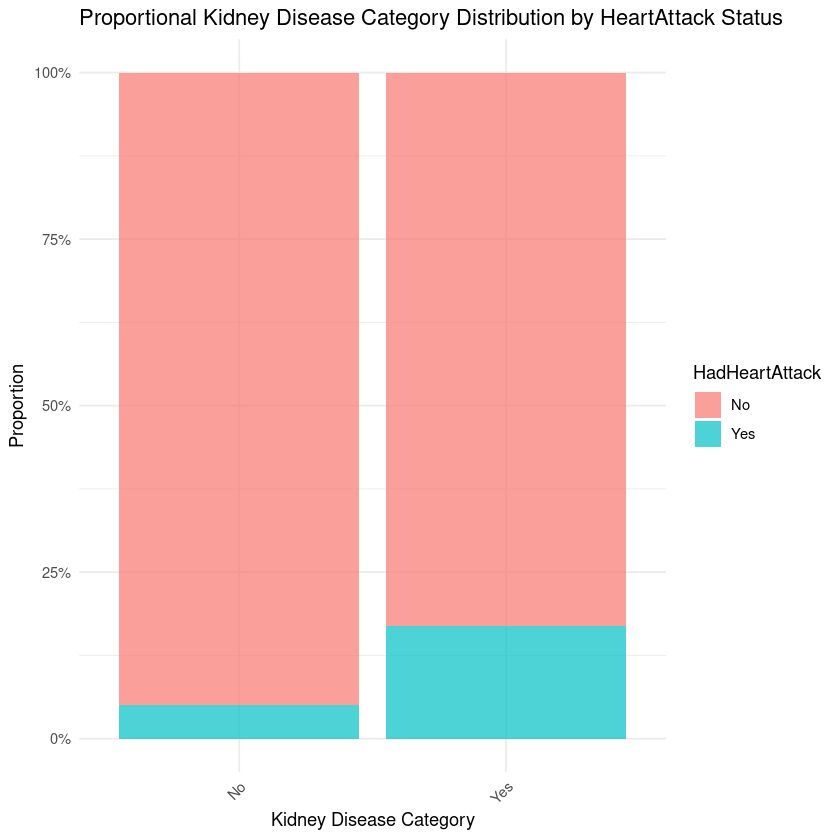

In [35]:
#Kidney Disease
table(data$HadKidneyDisease,data$HadHeartAttack)
ggplot(data, aes(x = HadKidneyDisease, fill = HadHeartAttack)) + 
  geom_bar(position = "fill", alpha = 0.7) +
  labs(
    title = "Proportional Kidney Disease Category Distribution by HeartAttack Status", 
    x = "Kidney Disease Category", 
    y = "Proportion"
  ) +
  scale_y_continuous(labels = scales::percent_format()) +  # Converts y-axis to percentages
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1)  # Adjusts x-axis label angle
  )
#Interp: Having a kidney disease may increase heart attack chances.

     
          No    Yes
  No  149713   5568
  Yes  74716   7633

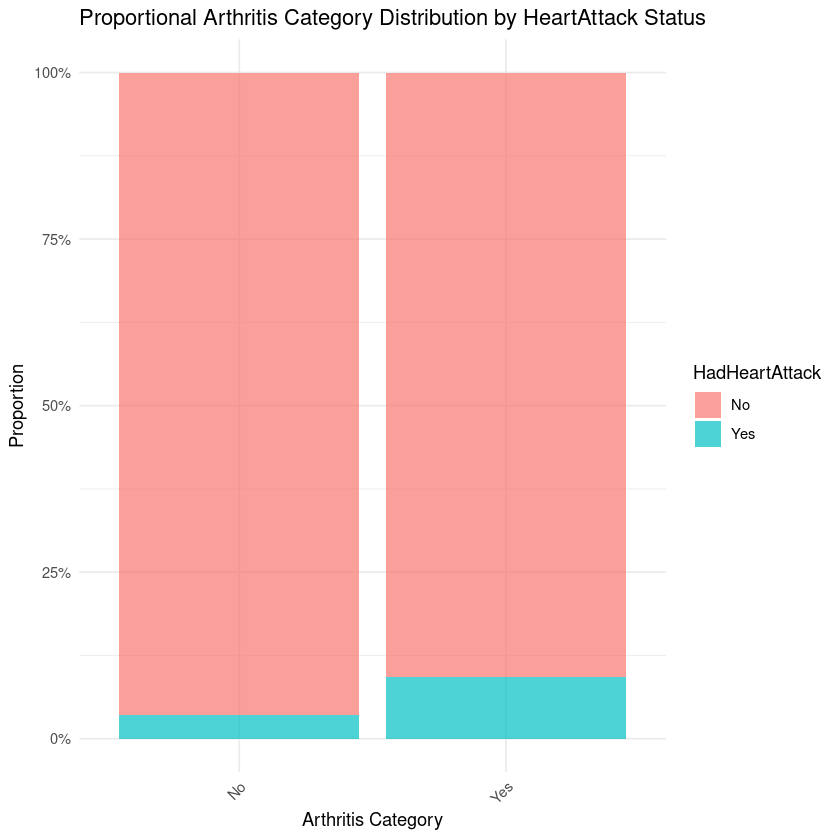

In [36]:
#Arthritis
table(data$HadArthritis,data$HadHeartAttack)
ggplot(data, aes(x = HadArthritis, fill = HadHeartAttack)) + 
  geom_bar(position = "fill", alpha = 0.7) +
  labs(
    title = "Proportional Arthritis Category Distribution by HeartAttack Status", 
    x = "Arthritis Category", 
    y = "Proportion"
  ) +
  scale_y_continuous(labels = scales::percent_format()) +  # Converts y-axis to percentages
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1)  # Adjusts x-axis label angle
  )
#Interp: Having arthritis may increase heart attack chances.

                                         
                                              No    Yes
  No                                      189291   8172
  Yes, but only during pregnancy (female)   1845     56
  No, pre-diabetes or borderline diabetes   4833    378
  Yes                                      28460   4595

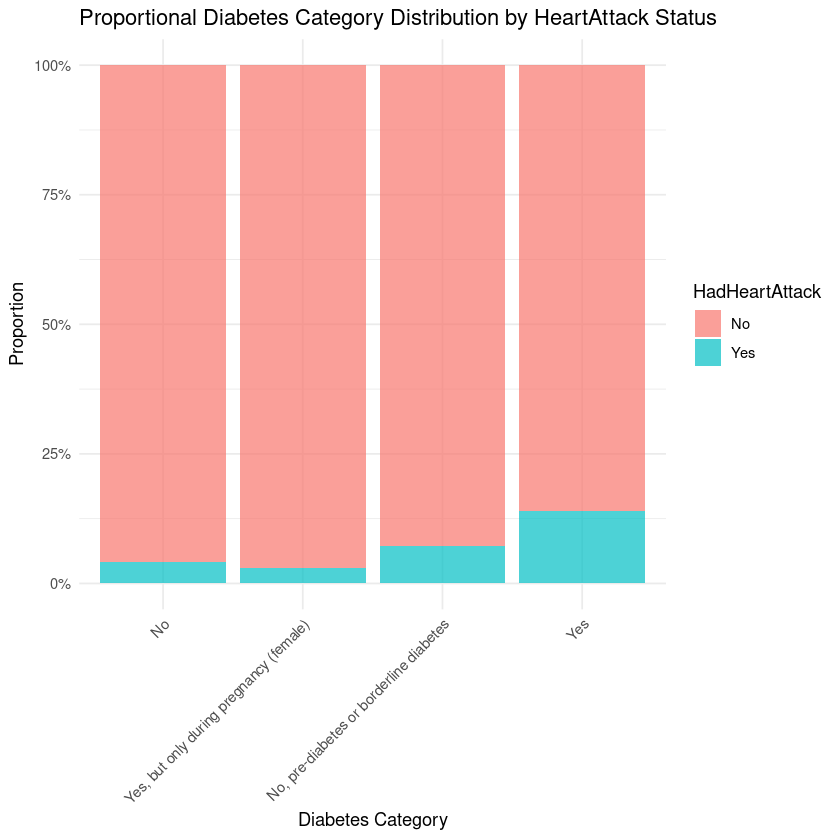

In [37]:
#Diabetes
table(data$HadDiabetes,data$HadHeartAttack)
ggplot(data, aes(x = HadDiabetes, fill = HadHeartAttack)) + 
  geom_bar(position = "fill", alpha = 0.7) +
  labs(
    title = "Proportional Diabetes Category Distribution by HeartAttack Status", 
    x = "Diabetes Category", 
    y = "Proportion"
  ) +
  scale_y_continuous(labels = scales::percent_format()) +  # Converts y-axis to percentages
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1)  # Adjusts x-axis label angle
  )
#Interp: Having diabetes may increase heart attack chances.

     
          No    Yes
  No  206532  10558
  Yes  17897   2643

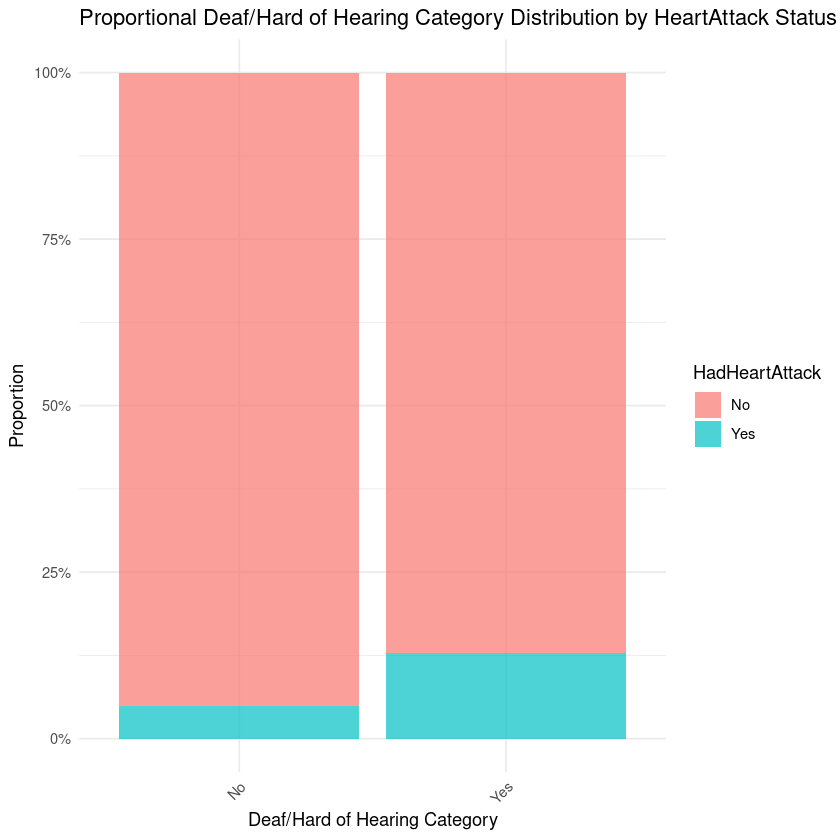

In [38]:
#Deaf/Hard of Hearing
table(data$DeafOrHardOfHearing,data$HadHeartAttack)
ggplot(data, aes(x = DeafOrHardOfHearing, fill = HadHeartAttack)) + 
  geom_bar(position = "fill", alpha = 0.7) +
  labs(
    title = "Proportional Deaf/Hard of Hearing Category Distribution by HeartAttack Status", 
    x = "Deaf/Hard of Hearing Category", 
    y = "Proportion"
  ) +
  scale_y_continuous(labels = scales::percent_format()) +  # Converts y-axis to percentages
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1)  # Adjusts x-axis label angle
  )
#Interp: Being deaf or hard of hearing may increase heart attack chances.

     
          No    Yes
  No  213978  11665
  Yes  10451   1536

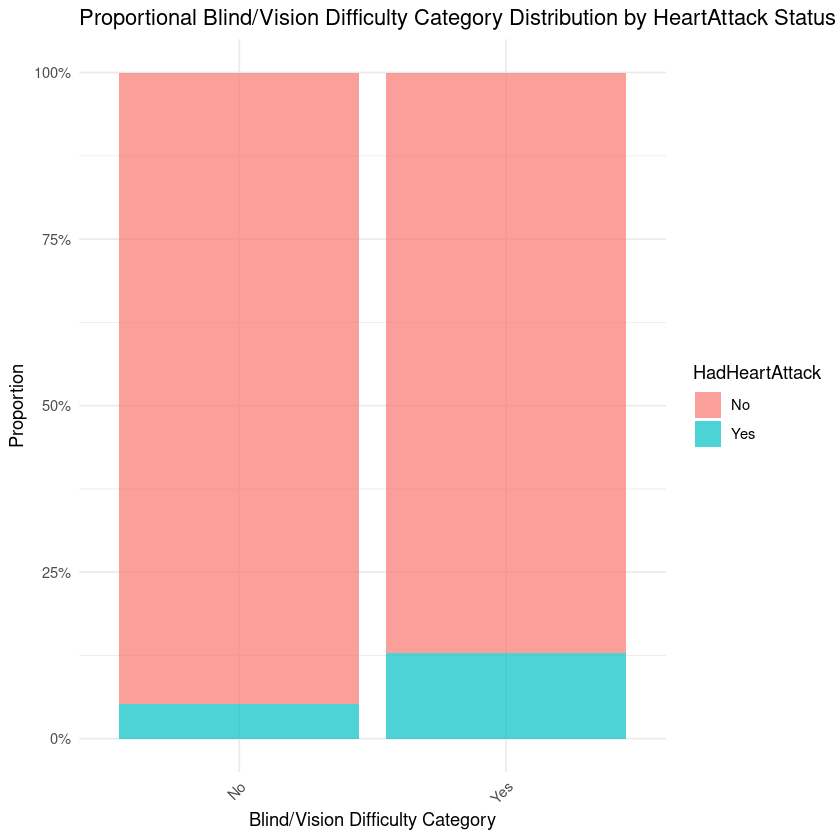

In [39]:
#Blind/Vision Difficulty
table(data$BlindOrVisionDifficulty,data$HadHeartAttack)
ggplot(data, aes(x = BlindOrVisionDifficulty, fill = HadHeartAttack)) + 
  geom_bar(position = "fill", alpha = 0.7) +
  labs(
    title = "Proportional Blind/Vision Difficulty Category Distribution by HeartAttack Status", 
    x = "Blind/Vision Difficulty Category", 
    y = "Proportion"
  ) +
  scale_y_continuous(labels = scales::percent_format()) +  # Converts y-axis to percentages
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1)  # Adjusts x-axis label angle
  )
#Interp: Being blind or having vision difficulty may increase heart attack chances.

     
          No    Yes
  No  201218  10911
  Yes  23211   2290

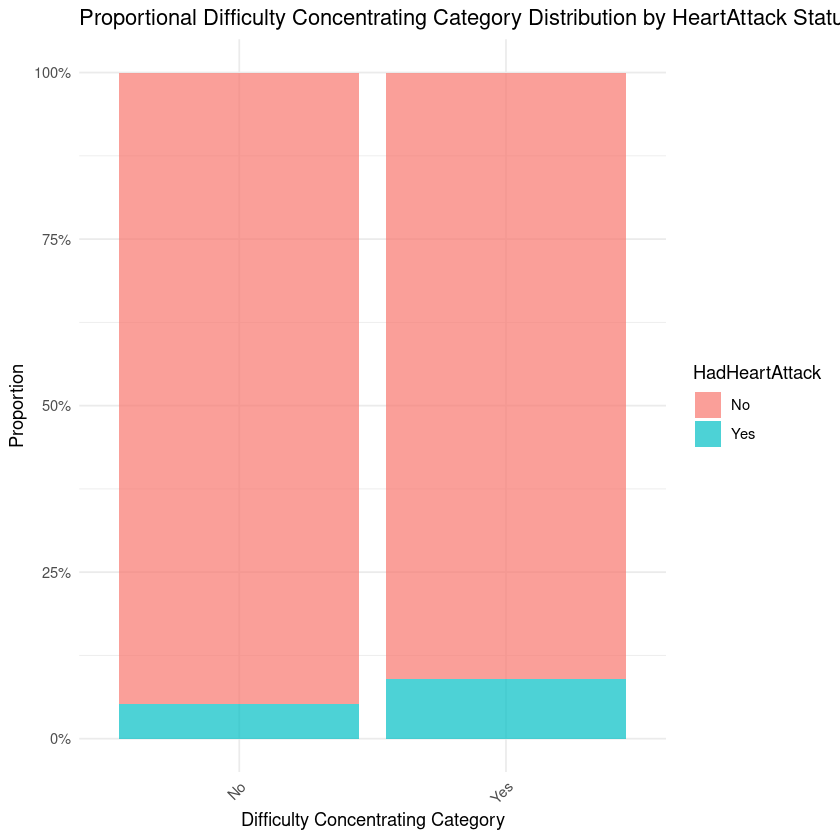

In [40]:
#Difficulty Concentrating
table(data$DifficultyConcentrating,data$HadHeartAttack)
ggplot(data, aes(x = DifficultyConcentrating, fill = HadHeartAttack)) + 
  geom_bar(position = "fill", alpha = 0.7) +
  labs(
    title = "Proportional Difficulty Concentrating Category Distribution by HeartAttack Status", 
    x = "Difficulty Concentrating Category", 
    y = "Proportion"
  ) +
  scale_y_continuous(labels = scales::percent_format()) +  # Converts y-axis to percentages
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1)  # Adjusts x-axis label angle
  )
#Interp: Difficulty concentrating may increase heart attack chances.

     
          No    Yes
  No  194092   8147
  Yes  30337   5054

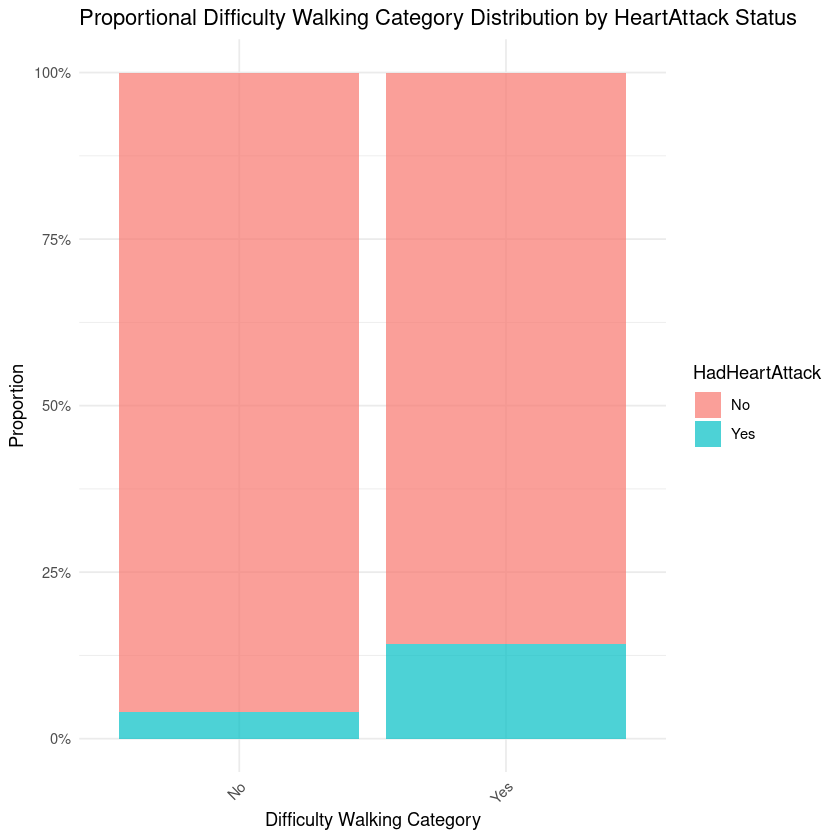

In [41]:
# Difficulty Walking
table(data$DifficultyWalking, data$HadHeartAttack)
ggplot(data, aes(x = DifficultyWalking, fill = HadHeartAttack)) + 
  geom_bar(position = "fill", alpha = 0.7) +
  labs(
    title = "Proportional Difficulty Walking Category Distribution by HeartAttack Status", 
    x = "Difficulty Walking Category", 
    y = "Proportion"
  ) +
  scale_y_continuous(labels = scales::percent_format()) +  # Converts y-axis to percentages
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1)  # Adjusts x-axis label angle
  )  # Closed the theme function properly
# Interp: difficulty walking may increase heart attack chances.

     
          No    Yes
  No  217504  11922
  Yes   6925   1279

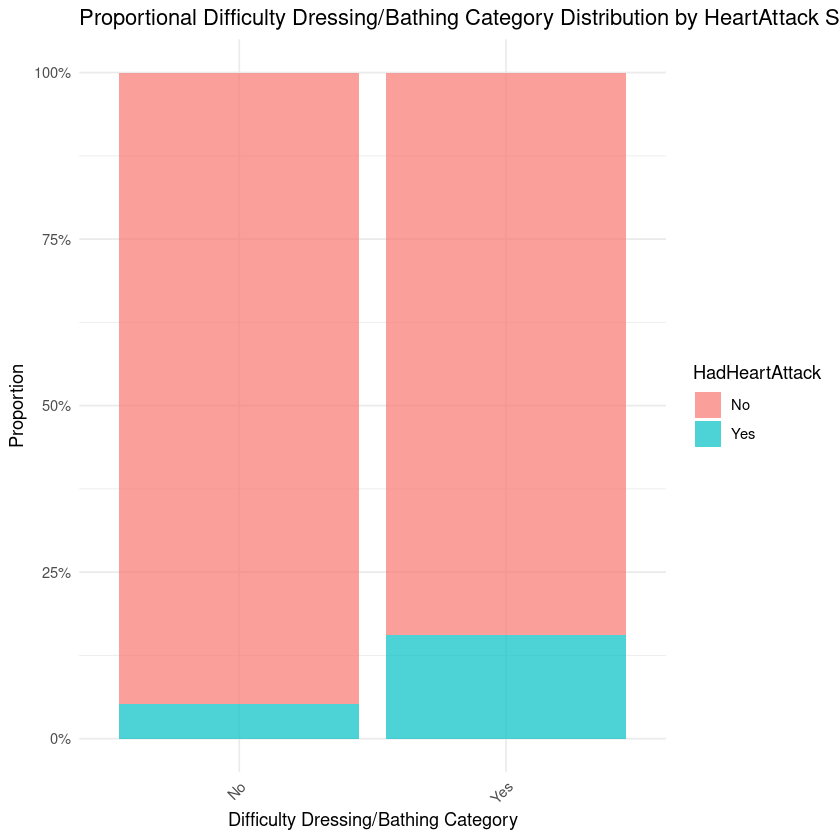

In [42]:
#Difficulty Dressing/Bathing
table(data$DifficultyDressingBathing,data$HadHeartAttack)
ggplot(data, aes(x = DifficultyDressingBathing, fill = HadHeartAttack)) + 
  geom_bar(position = "fill", alpha = 0.7) +
  labs(
    title = "Proportional Difficulty Dressing/Bathing Category Distribution by HeartAttack Status", 
    x = "Difficulty Dressing/Bathing Category", 
    y = "Proportion"
  ) +
  scale_y_continuous(labels = scales::percent_format()) +  # Converts y-axis to percentages
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1)  # Adjusts x-axis label angle
  )
#Interp: Difficulty dressing/bathing may increase heart attack chances.

     
          No    Yes
  No  210488  11086
  Yes  13941   2115

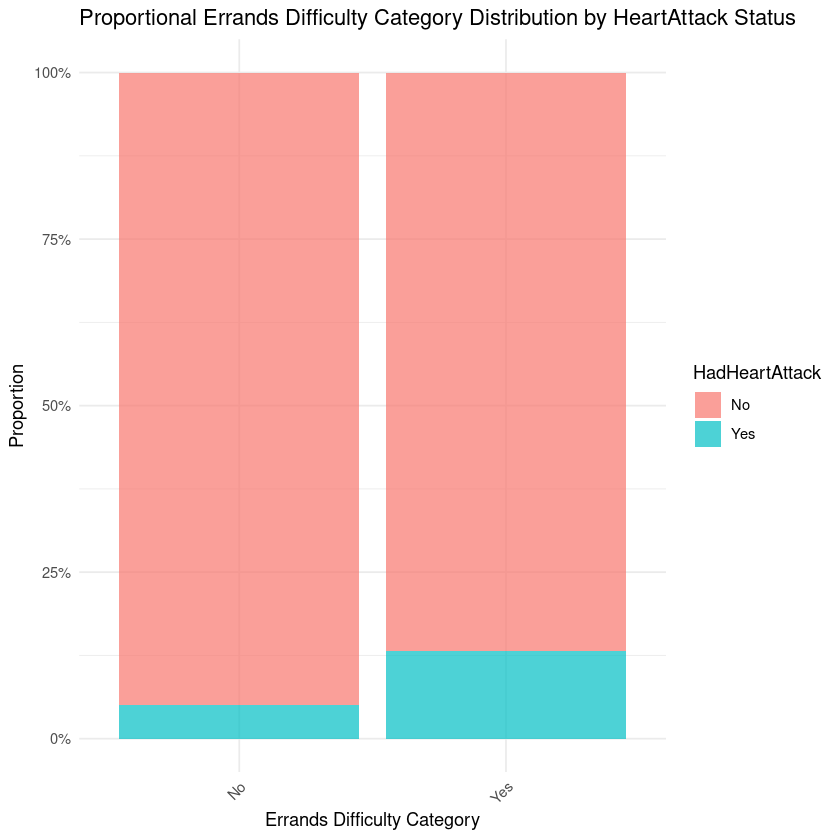

In [43]:
#Errand Difficulty
table(data$DifficultyErrands,data$HadHeartAttack)
ggplot(data, aes(x = DifficultyErrands, fill = HadHeartAttack)) + 
  geom_bar(position = "fill", alpha = 0.7) +
  labs(
    title = "Proportional Errands Difficulty Category Distribution by HeartAttack Status", 
    x = "Errands Difficulty Category", 
    y = "Proportion"
  ) +
  scale_y_continuous(labels = scales::percent_format()) +  # Converts y-axis to percentages
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1)  # Adjusts x-axis label angle
  )
#Interp: Difficulty running errands may increase heart attack chances.

                                       
                                            No    Yes
  Never smoked                          137012   5378
  Former smoker                          60698   5495
  Current smoker - now smokes some days   7347    552
  Current smoker - now smokes every day  19372   1776

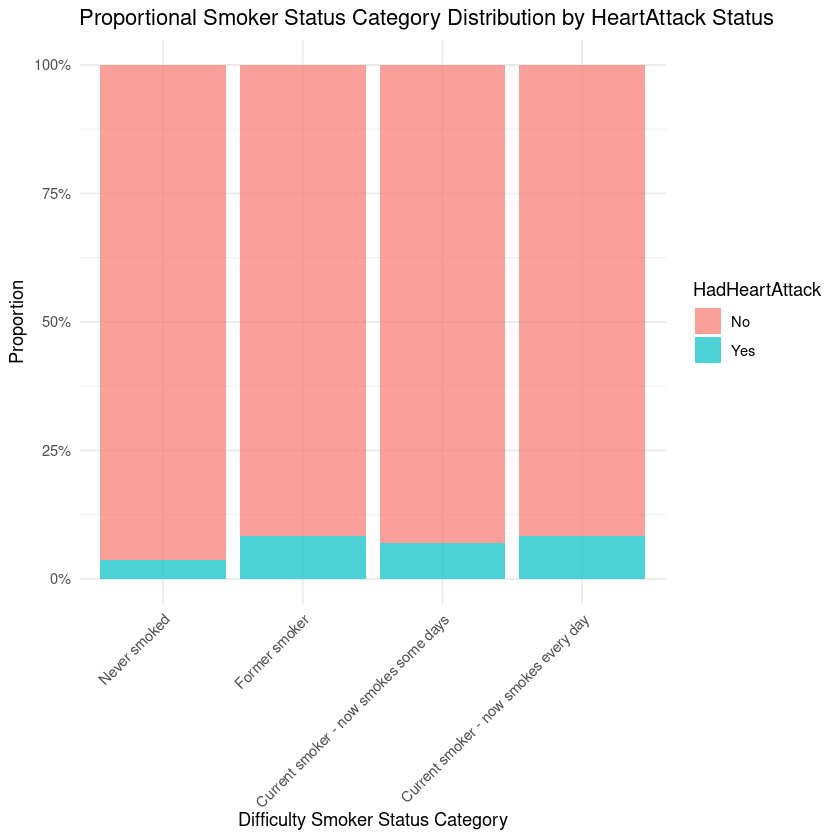

In [44]:
#Smoker Status
table(data$SmokerStatus,data$HadHeartAttack)
ggplot(data, aes(x = SmokerStatus, fill = HadHeartAttack)) + 
  geom_bar(position = "fill", alpha = 0.7) +
  labs(
    title = "Proportional Smoker Status Category Distribution by HeartAttack Status", 
    x = "Difficulty Smoker Status Category", 
    y = "Proportion"
  ) +
  scale_y_continuous(labels = scales::percent_format()) +  # Converts y-axis to percentages
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1)  # Adjusts x-axis label angle
  )
#Interp: Any form of smoking may increase heart attack chances.

                                           
                                                No    Yes
  Never used e-cigarettes in my entire life 173069  10377
  Not at all (right now)                     39558   2405
  Use them some days                          6223    245
  Use them every day                          5579    174

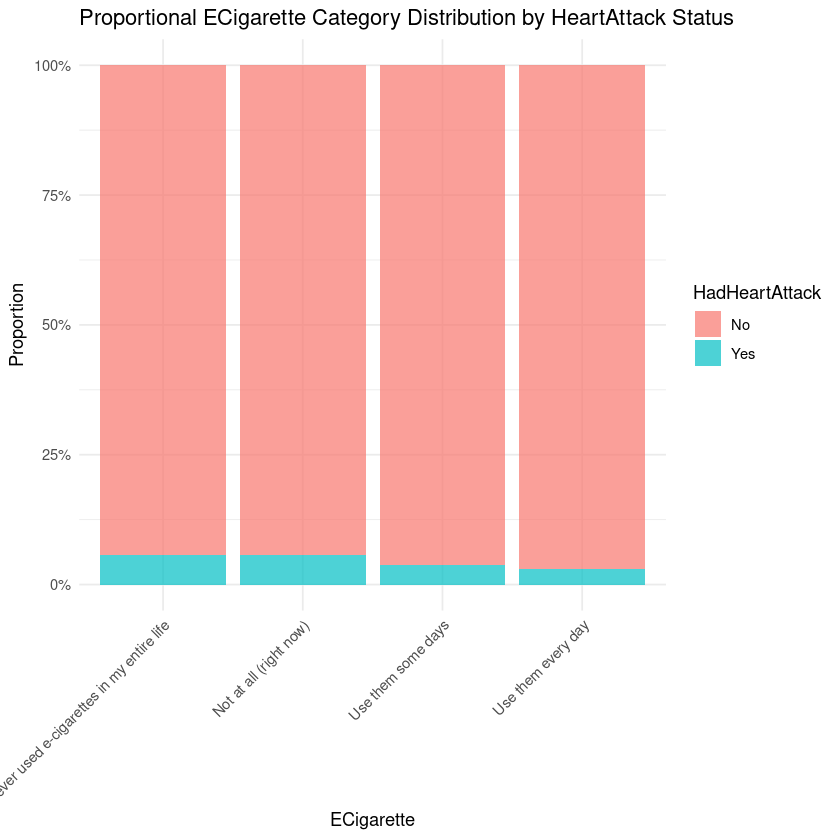

In [45]:
#ECigarette Status
table(data$ECigaretteUsage,data$HadHeartAttack)
ggplot(data, aes(x = ECigaretteUsage, fill = HadHeartAttack)) + 
  geom_bar(position = "fill", alpha = 0.7) +
  labs(
    title = "Proportional ECigarette Category Distribution by HeartAttack Status", 
    x = "ECigarette", 
    y = "Proportion"
  ) +
  scale_y_continuous(labels = scales::percent_format()) +  # Converts y-axis to percentages
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1)  # Adjusts x-axis label angle
  )
#Interp: Using e-cigarettes may decrease heart attack chances.

     
          No    Yes
  No  133141   3035
  Yes  91288  10166

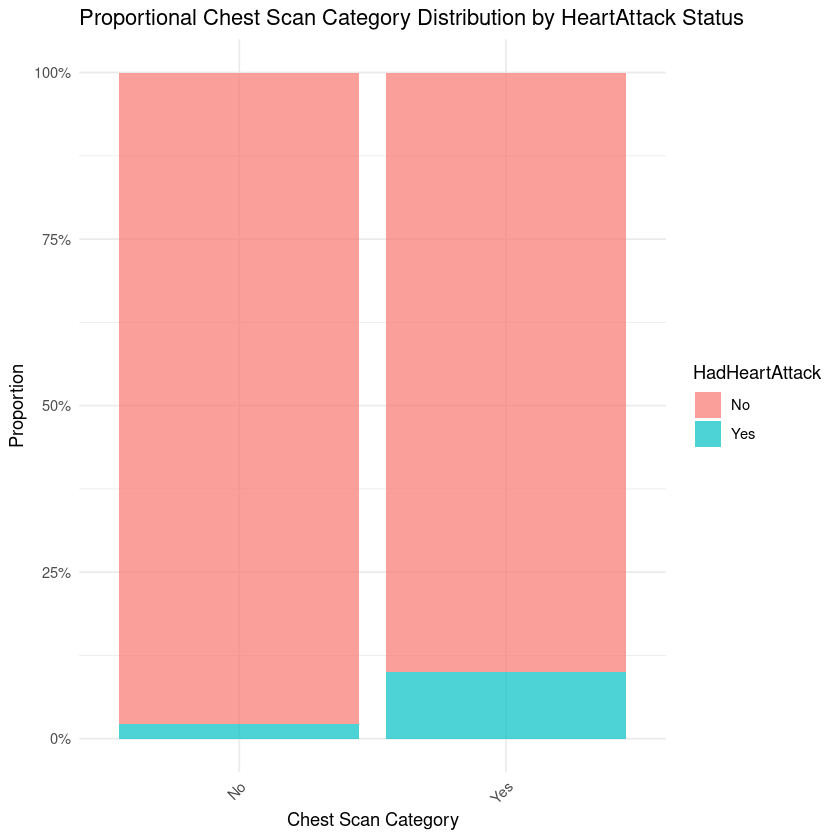

In [46]:
#Chest Scan Status
table(data$ChestScan,data$HadHeartAttack)
ggplot(data, aes(x = ChestScan, fill = HadHeartAttack)) + 
  geom_bar(position = "fill", alpha = 0.7) +
  labs(
    title = "Proportional Chest Scan Category Distribution by HeartAttack Status", 
    x = "Chest Scan Category", 
    y = "Proportion"
  ) +
  scale_y_continuous(labels = scales::percent_format()) +  # Converts y-axis to percentages
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1)  # Adjusts x-axis label angle
  )
#Interp: Chest scan may increase heart attack chances.

                               
                                    No    Yes
  Black only, Non-Hispanic       18171    882
  Hispanic                       21171    852
  Multiracial, Non-Hispanic       5047    336
  Other race only, Non-Hispanic  11218    584
  White only, Non-Hispanic      168822  10547

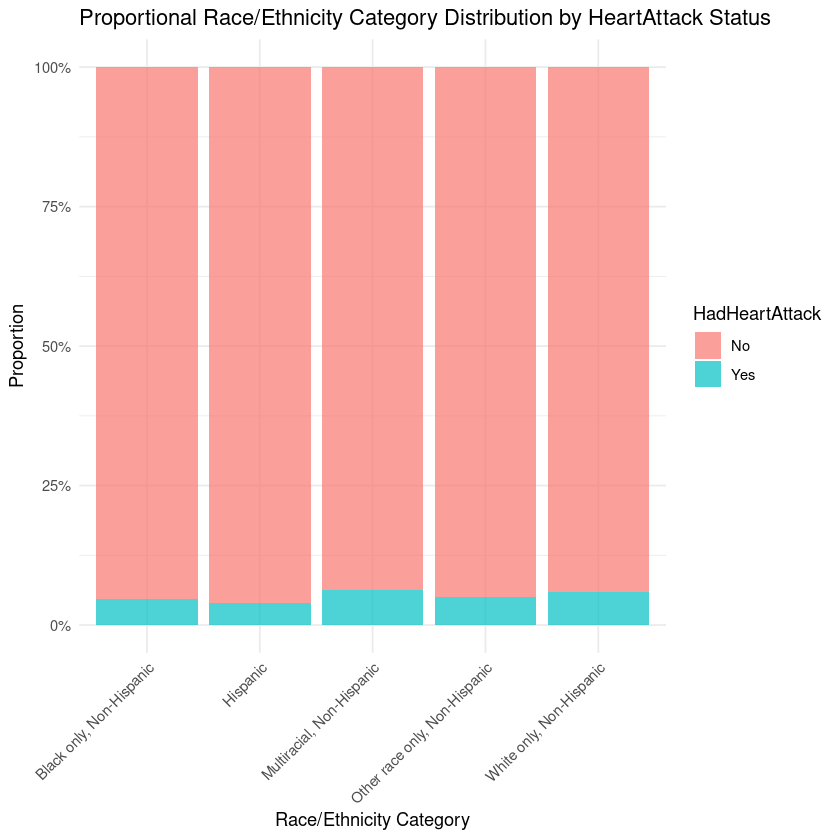

In [47]:
#Ethnicity
table(data$RaceEthnicityCategory,data$HadHeartAttack)
ggplot(data, aes(x = RaceEthnicityCategory, fill = HadHeartAttack)) + 
  geom_bar(position = "fill", alpha = 0.7) +
  labs(
    title = "Proportional Race/Ethnicity Category Distribution by HeartAttack Status", 
    x = "Race/Ethnicity Category", 
    y = "Proportion"
  ) +
  scale_y_continuous(labels = scales::percent_format()) +  # Converts y-axis to percentages
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1)  # Adjusts x-axis label angle
  )
# Interp: May be slightly higher heart attack chances for White/Non-Hispanic and Multiracial/Non-Hispanic.

     
          No    Yes
  No  100054   8000
  Yes 124375   5201

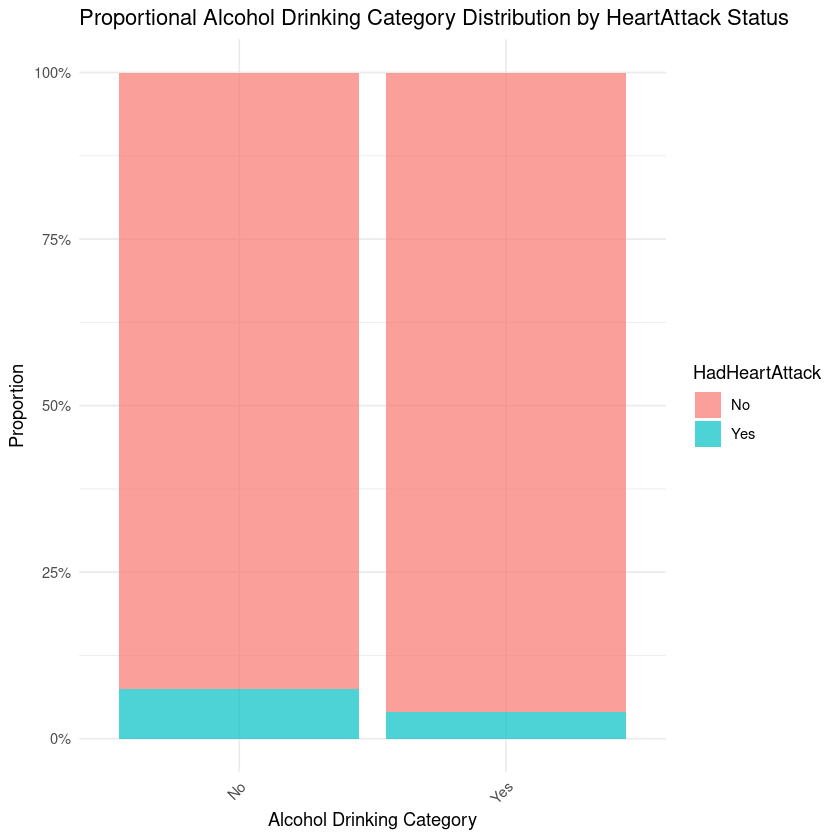

In [48]:
#Alcohol Drinking
table(data$AlcoholDrinkers,data$HadHeartAttack)
ggplot(data, aes(x = AlcoholDrinkers, fill = HadHeartAttack)) + 
  geom_bar(position = "fill", alpha = 0.7) +
  labs(
    title = "Proportional Alcohol Drinking Category Distribution by HeartAttack Status", 
    x = "Alcohol Drinking Category", 
    y = "Proportion"
  ) +
  scale_y_continuous(labels = scales::percent_format()) +  # Converts y-axis to percentages
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1)  # Adjusts x-axis label angle
  )
# Interp: If you drink less, you may have a lesser chance of heart attack.

     
          No    Yes
  No  147159   9036
  Yes  77270   4165

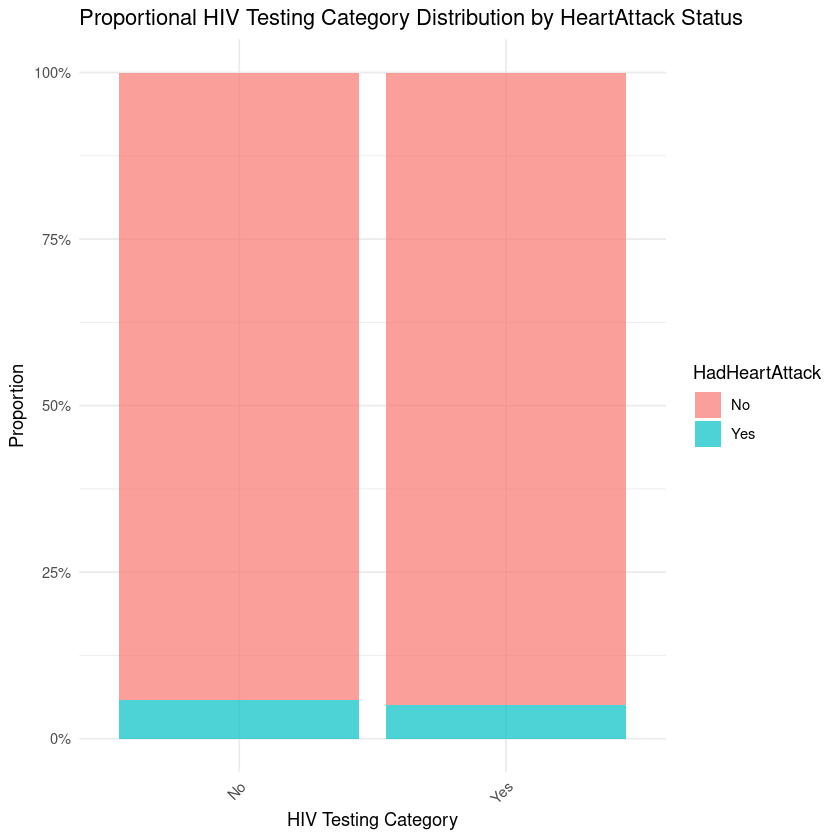

In [49]:
#HIV Testing
table(data$HIVTesting,data$HadHeartAttack)
ggplot(data, aes(x = HIVTesting, fill = HadHeartAttack)) + 
  geom_bar(position = "fill", alpha = 0.7) +
  labs(
    title = "Proportional HIV Testing Category Distribution by HeartAttack Status", 
    x = "HIV Testing Category", 
    y = "Proportion"
  ) +
  scale_y_continuous(labels = scales::percent_format()) +  # Converts y-axis to percentages
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1)  # Adjusts x-axis label angle
  )
#Interp: there is not a significant difference in the proportions. there may be a slightly less chance of heart attack if you tested negative for HIV.

     
          No    Yes
  No  106314   4919
  Yes 118115   8282

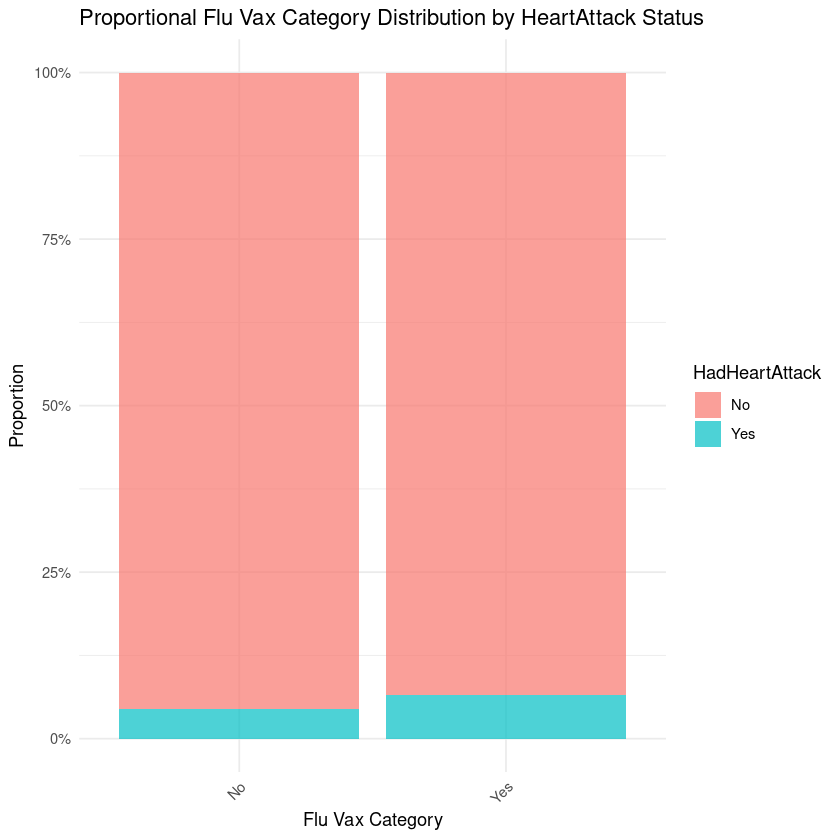

In [50]:
#FLU Vax
table(data$FluVaxLast12,data$HadHeartAttack)
ggplot(data, aes(x = FluVaxLast12, fill = HadHeartAttack)) + 
  geom_bar(position = "fill", alpha = 0.7) +
  labs(
    title = "Proportional Flu Vax Category Distribution by HeartAttack Status", 
    x = "Flu Vax Category", 
    y = "Proportion"
  ) +
  scale_y_continuous(labels = scales::percent_format()) +  # Converts y-axis to percentages
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1)  # Adjusts x-axis label angle
  )
# Interp: Those that get the flu vaccination may have a higher risk of heart attack.

     
          No    Yes
  No  136271   4614
  Yes  88158   8587

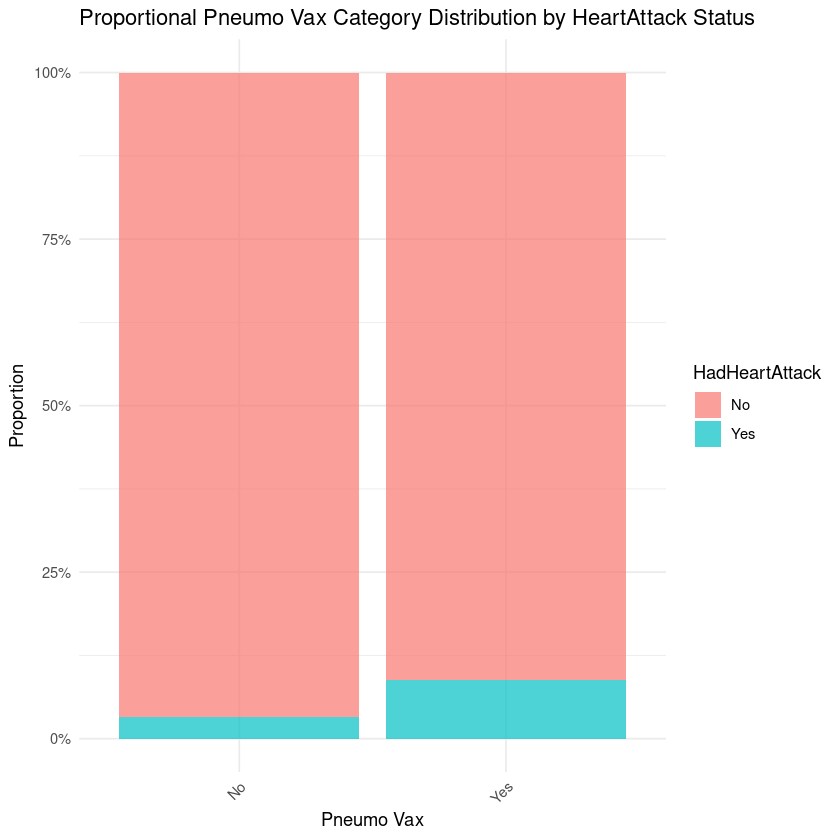

In [51]:
#Pneumo Vax
table(data$PneumoVaxEver,data$HadHeartAttack)
ggplot(data, aes(x = PneumoVaxEver, fill = HadHeartAttack)) + 
  geom_bar(position = "fill", alpha = 0.7) +
  labs(
    title = "Proportional Pneumo Vax Category Distribution by HeartAttack Status", 
    x = "Pneumo Vax", 
    y = "Proportion"
  ) +
  scale_y_continuous(labels = scales::percent_format()) +  # Converts y-axis to percentages
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1)  # Adjusts x-axis label angle
  )
# Interp: those that have pneumonia vaccination may lead to higher risk of heart attack. 

                                                           
                                                               No   Yes
  No, did not receive any tetanus shot in the past 10 years 74678  4692
  Yes, received Tdap                                        64663  2755
  Yes, received tetanus shot but not sure what type         67012  4526
  Yes, received tetanus shot, but not Tdap                  18076  1228

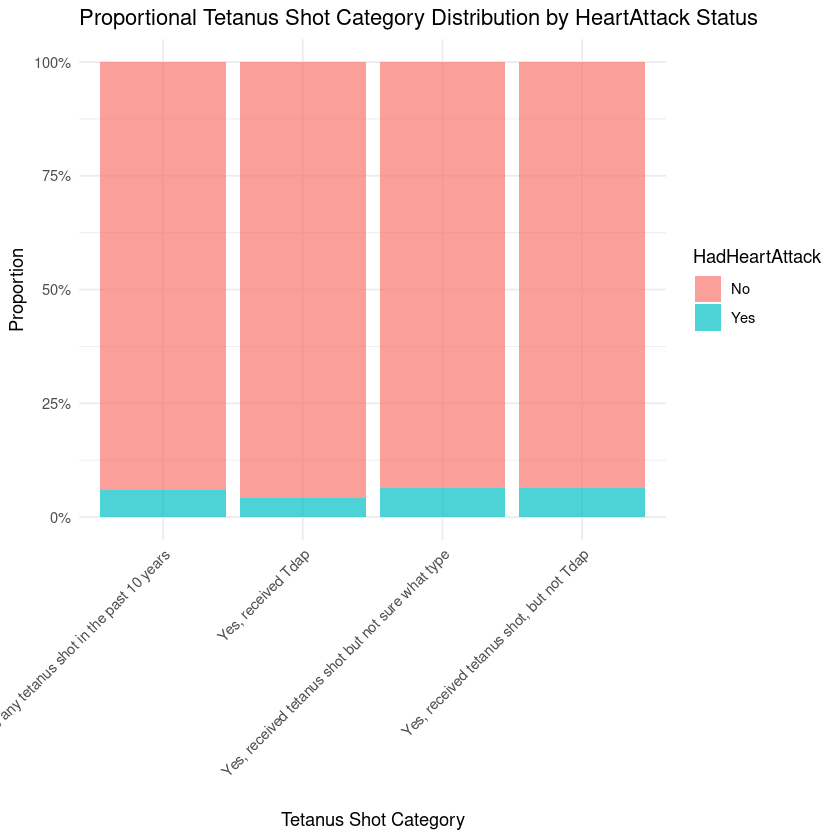

In [52]:
#Tetnus Shot
table(data$TetanusLast10Tdap,data$HadHeartAttack)
ggplot(data, aes(x = TetanusLast10Tdap, fill = HadHeartAttack)) + 
  geom_bar(position = "fill", alpha = 0.7) +
  labs(
    title = "Proportional Tetanus Shot Category Distribution by HeartAttack Status", 
    x = "Tetanus Shot Category", 
    y = "Proportion"
  ) +
  scale_y_continuous(labels = scales::percent_format()) +  # Converts y-axis to percentages
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1)  # Adjusts x-axis label angle
  )
# Interp: Those that received "some" tetanus shot and recieved one that was not Tdap may have a higher chance of a heart attack.

     
          No    Yes
  No  214584  12870
  Yes   9845    331

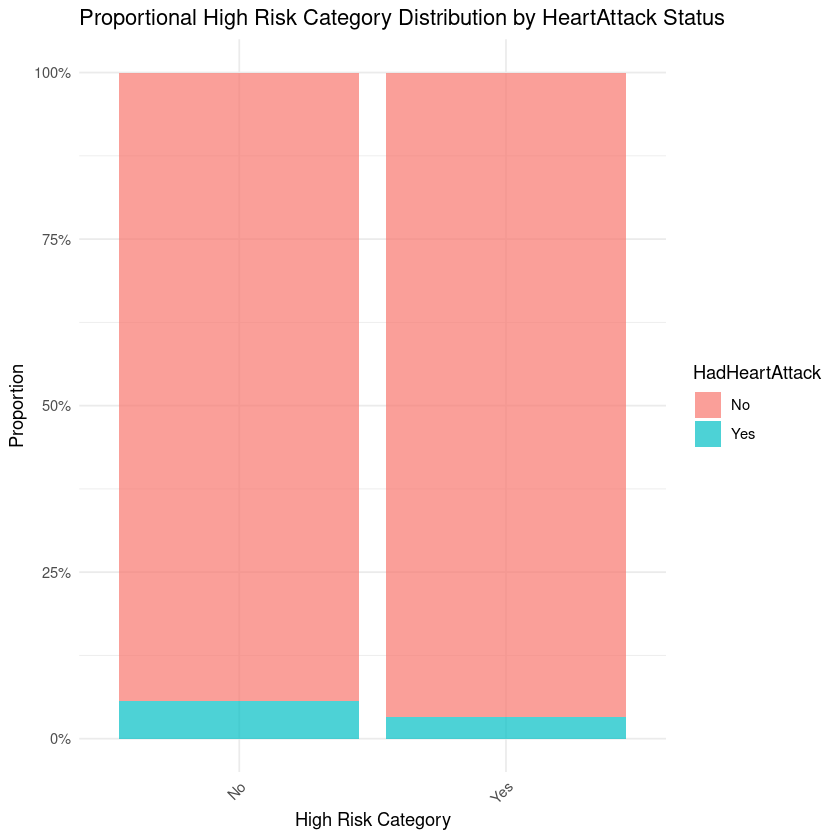

In [53]:
#High Risk Last Year
table(data$HighRiskLastYear,data$HadHeartAttack)
ggplot(data, aes(x = HighRiskLastYear, fill = HadHeartAttack)) + 
  geom_bar(position = "fill", alpha = 0.7) +
  labs(
    title = "Proportional High Risk Category Distribution by HeartAttack Status", 
    x = "High Risk Category", 
    y = "Proportion"
  ) +
  scale_y_continuous(labels = scales::percent_format()) +  # Converts y-axis to percentages
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1)  # Adjusts x-axis label angle
  )
# Interp: Those that were not at high risk last year may have less of a chance of a heart attack.

     
          No    Yes
  No  157530   9776
  Yes  66899   3425

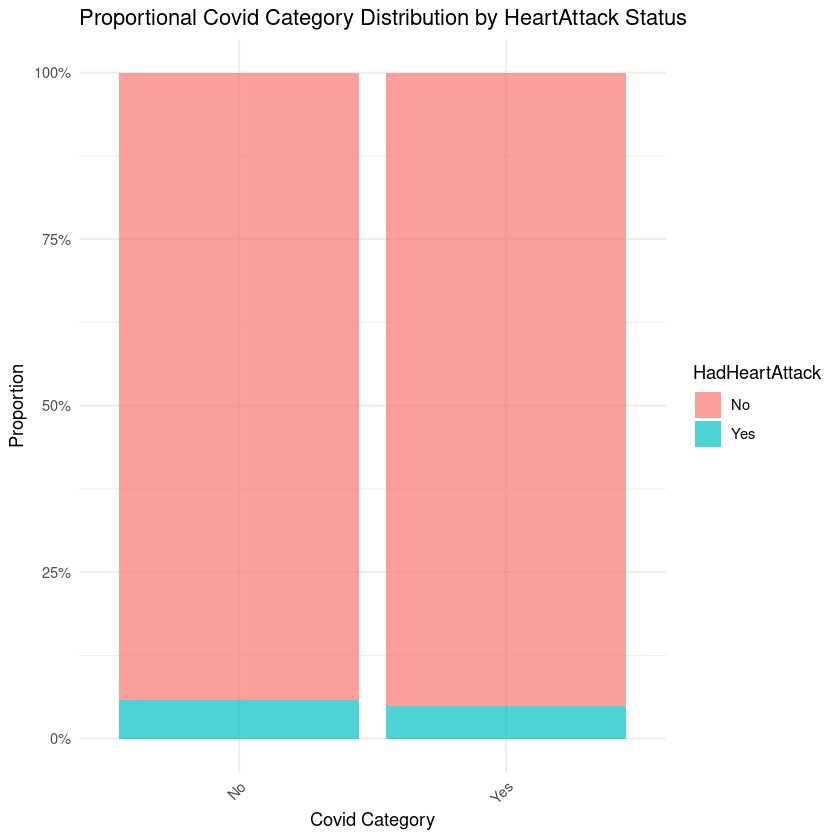

In [54]:
#Covid
table(data$CovidPos,data$HadHeartAttack)
ggplot(data, aes(x = CovidPos, fill = HadHeartAttack)) + 
  geom_bar(position = "fill", alpha = 0.7) +
  labs(
    title = "Proportional Covid Category Distribution by HeartAttack Status", 
    x = "Covid Category", 
    y = "Proportion"
  ) +
  scale_y_continuous(labels = scales::percent_format()) +  # Converts y-axis to percentages
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1)  # Adjusts x-axis label angle
  )
# Interp: Those that did not have covid may have less of a chance of a heart attack

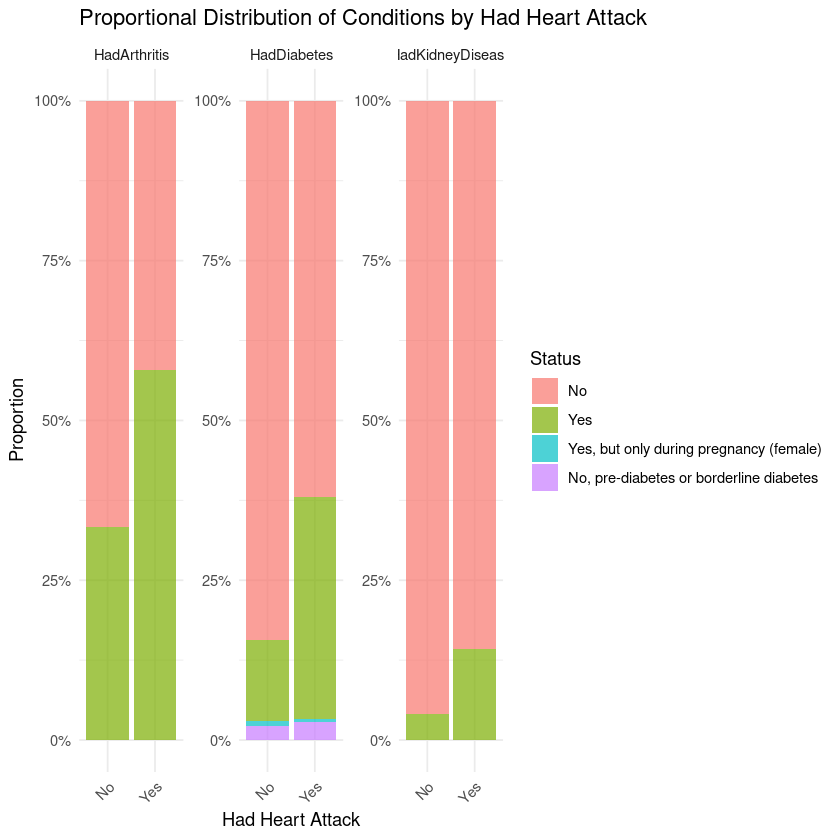

In [55]:
# Conditions vs High Risk Last Year
conditions <- c("HadKidneyDisease", "HadArthritis", "HadDiabetes")

# Create a combined dataframe for plotting
plot_data <- data %>%
  dplyr::select(HadHeartAttack, all_of(conditions)) %>%
  pivot_longer(cols = all_of(conditions), names_to = "Condition", values_to = "Status")

# Plot
ggplot(plot_data, aes(x = HadHeartAttack, fill = Status)) + 
  geom_bar(position = "fill", alpha = 0.7) +
  facet_wrap(~ Condition, scales = "free_y") +
  labs(
    title = "Proportional Distribution of Conditions by Had Heart Attack", 
    x = "Had Heart Attack", 
    y = "Proportion"
  ) +
  scale_y_continuous(labels = scales::percent_format()) +  # Converts y-axis to percentages
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1)  # Adjusts x-axis label angle
  )

# Interpretation: The chart shows the proportional distribution of three health conditions (Kidney Disease, Arthritis, Diabetes) among individuals who had a heart attack. Had Arthritis indicates the highest correlation with had heart attacks.

Explanation of the Graph

The graph visualizes the relationship between having a heart attack and three specific health conditions: Kidney Disease, Arthritis, and Diabetes. Here's a simple breakdown:

- **X-axis (Had Heart Attack)**: This axis shows whether individuals have had a heart attack or not.
- **Y-axis (Proportion)**: This axis represents the proportion of individuals with each condition, displayed as a percentage.
- **Bars**: Each bar represents the proportion of individuals with a specific condition (Kidney Disease, Arthritis, Diabetes) who have had a heart attack.

Key Points:
- **Proportional Distribution**: The graph shows the distribution of each condition among those who have had a heart attack.
- **Conditions**: The conditions are shown separately in different facets (Kidney Disease, Arthritis, Diabetes).
- **Highest Correlation**: Arthritis shows the highest correlation with having had a heart attack, meaning a larger proportion of individuals with arthritis have had a heart attack compared to the other conditions.

Visual Features:
- **Fill Color**: The bars are filled based on the status of the condition (whether the individual has the condition or not).
- **Percentage Labels**: The y-axis is labeled with percentages to make it easier to understand the proportions.
- **X-axis Labels**: The x-axis labels are angled for better readability.

In summary, the graph helps to understand how common these conditions are among individuals who have had a heart attack, with arthritis showing the strongest association.

# Model Selection and Training

## Model 1: Uncentered and Unscaled Logistic Regression 
Assumptions: 
-Linearity of the Logit
-Absence of Multicollinearity
-No Influential Outliers
-Independence of Observations

### All Predictors

In [56]:
logreg <- glm(HadHeartAttack~.,data=sampled_data, family=binomial)

In [57]:
summary(logreg)


Call:
glm(formula = HadHeartAttack ~ ., family = binomial, data = sampled_data)

Coefficients:
                                                                    Estimate
(Intercept)                                                        -5.728669
SexMale                                                             0.696606
GeneralHealthFair                                                  -0.198114
GeneralHealthGood                                                  -0.404748
GeneralHealthVery good                                             -0.778147
GeneralHealthExcellent                                             -1.091521
AgeCategoryAge 25 to 29                                             0.009123
AgeCategoryAge 30 to 34                                             0.342572
AgeCategoryAge 35 to 39                                             0.683836
AgeCategoryAge 40 to 44                                             0.819214
AgeCategoryAge 45 to 49                                  

Logistic Regression Assumptions:

Assumption 1 Check: Absense of Multicoliniarity:

In [59]:
vif(logreg)

,GVIF,Df,GVIF^(1/(2*Df))
Sex,2.082264,1,1.443005
GeneralHealth,1.649189,4,1.064532
AgeCategory,2.148674,12,1.032382
HeightInMeters,17.525474,1,4.186344
WeightInKilograms,58.681195,1,7.660365
BMI,45.980852,1,6.780918
HadAngina,1.112733,1,1.054862
HadStroke,1.056363,1,1.027795
HadAsthma,1.148568,1,1.071713
HadSkinCancer,1.085084,1,1.041674


Interpretation: WeightInKilligrams and BMI are highly correlated and each have VIF values far above 5. Conceptually this makes sense, since BMI is a calculated field that is dependent on Weight. To solve this, we removed BMI from the final model.

Assumption 2 Check: Linearity of the Logit:

In [ ]:
library(dplyr)
library(tidyr)
library(ggplot2)

# Select numeric columns and add probs to the dataset for consistency
testdata <- testdata %>%
  mutate(probs = probs)  # Ensure `probs` is part of the dataframe

# Select numeric columns and reduce dataset size
mydata <- testdata %>%
  select(where(is.numeric)) %>%
  sample_n(min(10000, nrow(.)))  # Reduce dataset size

# Add logit column and reshape data
mydata <- mydata %>%
  mutate(logit = log(probs / (1 - probs))) %>%
  pivot_longer(cols = -logit, names_to = "predictors", values_to = "predictor.value")

# Plot
ggplot(mydata, aes(logit, predictor.value)) +
  geom_point(size = 0.5, alpha = 0.5) +
  geom_smooth(method = "loess", se = FALSE) +  # Use 'lm' for faster smoothing
  theme_bw() +
  facet_wrap(~predictors, scales = "free_y")

Interpretation: The trend line is almost flat across all values of logit, indicating no meaningful relationship between height and logit. The trend line shows a slight curvature, particularly at lower logit values, suggesting that the relationship between BMI and logit is not perfectly linear. The trend line shows some curvature at the ends of the logit values, suggesting a slightly non-linear relationship between weight and logit.

Assumption 3 Check: No Influential Outliers:

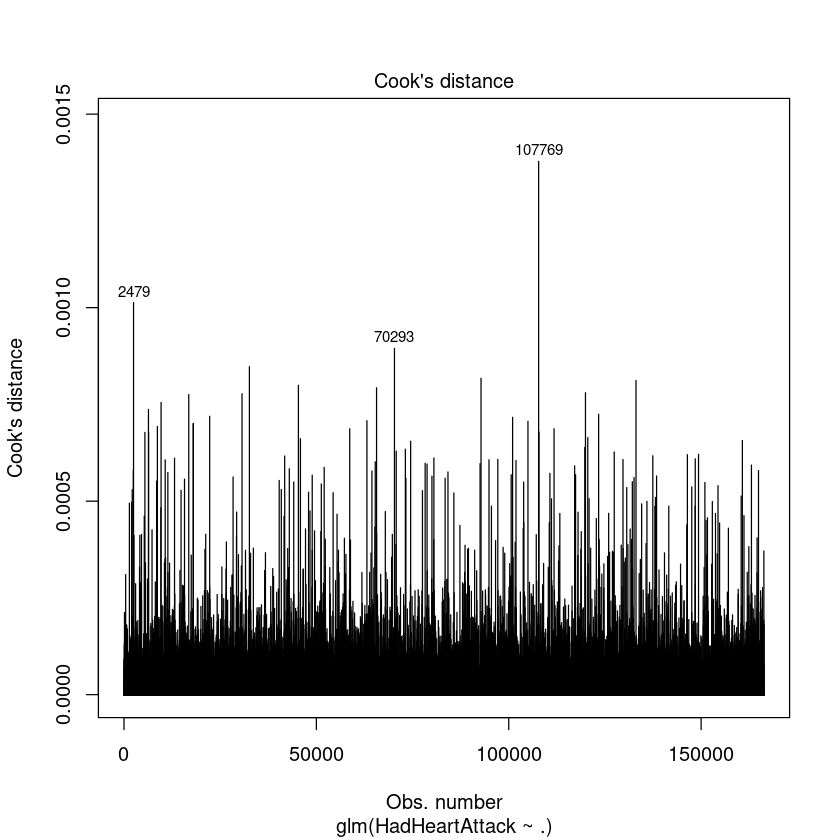

In [60]:
plot(logreg,which=c(4))

In [61]:
sampled_data[2479,]
sampled_data[70239,]
sampled_data[-107769,]

Sex,GeneralHealth,AgeCategory,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,HadStroke,HadAsthma,⋯,ChestScan,RaceEthnicityCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,Region
<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
Female,Excellent,Age 25 to 29,1.6,65.77,25.69,Yes,No,No,No,⋯,No,Hispanic,No,No,No,No,"No, did not receive any tetanus shot in the past 10 years",No,No,South


Sex,GeneralHealth,AgeCategory,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,HadStroke,HadAsthma,⋯,ChestScan,RaceEthnicityCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,Region
<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
Female,Good,Age 18 to 24,1.68,90.72,32.28,No,No,No,No,⋯,No,Hispanic,Yes,Yes,No,No,"Yes, received Tdap",No,No,Northeast


Sex,GeneralHealth,AgeCategory,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,HadStroke,HadAsthma,⋯,ChestScan,RaceEthnicityCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,Region
<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
Female,Excellent,Age 75 to 79,1.60,74.84,29.23,No,No,No,No,⋯,No,"White only, Non-Hispanic",No,No,No,No,"No, did not receive any tetanus shot in the past 10 years",No,No,West
Male,Very good,Age 40 to 44,1.93,113.40,30.43,No,No,No,Yes,⋯,Yes,"White only, Non-Hispanic",Yes,No,No,No,"Yes, received tetanus shot but not sure what type",No,No,West
Male,Very good,Age 70 to 74,1.88,88.45,25.04,No,Yes,No,No,⋯,No,"White only, Non-Hispanic",Yes,No,Yes,Yes,"No, did not receive any tetanus shot in the past 10 years",No,No,South
Female,Excellent,Age 60 to 64,1.63,66.22,25.06,No,No,No,No,⋯,No,"White only, Non-Hispanic",Yes,No,Yes,No,"No, did not receive any tetanus shot in the past 10 years",No,Yes,South
Female,Very good,Age 55 to 59,1.68,83.91,29.86,No,No,No,Yes,⋯,No,"White only, Non-Hispanic",Yes,No,No,No,"No, did not receive any tetanus shot in the past 10 years",No,Yes,South
Male,Very good,Age 40 to 44,1.75,122.47,39.87,No,No,No,No,⋯,Yes,"White only, Non-Hispanic",Yes,Yes,No,No,"No, did not receive any tetanus shot in the past 10 years",No,Yes,Territories
Female,Excellent,Age 65 to 69,1.60,54.43,21.26,No,No,No,No,⋯,No,"White only, Non-Hispanic",Yes,No,Yes,No,"No, did not receive any tetanus shot in the past 10 years",No,No,South
Female,Very good,Age 45 to 49,1.60,79.38,31.00,No,No,No,No,⋯,No,"White only, Non-Hispanic",No,Yes,Yes,No,"Yes, received Tdap",No,No,South
Female,Very good,Age 60 to 64,1.60,63.50,24.80,No,No,No,No,⋯,No,"White only, Non-Hispanic",Yes,No,Yes,No,"No, did not receive any tetanus shot in the past 10 years",No,No,West


Interpretation: 2479, 70239,107769, have the highest Cook's Distance values. After reviewing each of these points, we decided to leave them each in the model because of both the plausibility and validity of the points. Additionally,  Cook's Distance values > 0.5 or 1 are often considered concerning, and each of these points has distance values substaintially below that.

Assumption 4 Check: Absense of Independence of Observations:

In [2]:
library(readxl)
dataindependence <- read_excel("Patients Data ( Used for Heart Disease Prediction ).xlsx")
head(dataindependence)

PatientID,State,Sex,GeneralHealth,AgeCategory,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,⋯,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,Alabama,Female,Fair,Age 75 to 79,1.63,84.82,32.10,0,1,⋯,Never used e-cigarettes in my entire life,1,"White only, Non-Hispanic",0,0,0,1,"No, did not receive any tetanus shot in the past 10 years",0,1
2,Alabama,Female,Very good,Age 65 to 69,1.60,71.67,27.99,0,0,⋯,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",0,0,1,1,"Yes, received Tdap",0,0
3,Alabama,Male,Excellent,Age 60 to 64,1.78,71.21,22.53,0,0,⋯,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",1,0,0,0,"Yes, received tetanus shot but not sure what type",0,0
4,Alabama,Male,Very good,Age 70 to 74,1.78,95.25,30.13,0,0,⋯,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",0,0,1,1,"Yes, received tetanus shot but not sure what type",0,0
5,Alabama,Female,Good,Age 50 to 54,1.68,78.02,27.76,0,0,⋯,Never used e-cigarettes in my entire life,1,"Black only, Non-Hispanic",0,0,1,0,"No, did not receive any tetanus shot in the past 10 years",0,0
6,Alabama,Male,Very good,Age 75 to 79,1.85,108.86,31.66,0,0,⋯,Never used e-cigarettes in my entire life,1,"White only, Non-Hispanic",1,0,0,1,"No, did not receive any tetanus shot in the past 10 years",0,1


In [3]:
length(unique(dataindependence$PatientID))
nrow(dataindependence)

[1] 237630

[1] 237630

Interpretation: Each patient is only in the data set one time. Since this data set is from US census data and therefore randomly selected accross the United States, we can also assume observation independence as a result.

### Significant Predictors

Since our step function would not run due to the substantial size of our data, we modeled the backward stepwise function by hand, by removing one insignificant variable at a time and rerunning the model until only significant variables remained.

In [8]:
steplogreg <- glm(HadHeartAttack~.-HadAsthma-HeightInMeters-HighRiskLastYear-CovidPos-HadDepressiveDisorder-HadKidneyDisease-ECigaretteUsage-HadCOPD-HIVTesting-DifficultyDressingBathing-DifficultyWalking-DifficultyConcentrating-Region-BMI-RaceEthnicityCategory-AlcoholDrinkers-HadSkinCancer-DifficultyErrands
,data=sampled_data, family=binomial)

In [9]:
summary(steplogreg)


Call:
glm(formula = HadHeartAttack ~ . - HadAsthma - HeightInMeters - 
    HighRiskLastYear - CovidPos - HadDepressiveDisorder - HadKidneyDisease - 
    ECigaretteUsage - HadCOPD - HIVTesting - DifficultyDressingBathing - 
    DifficultyWalking - DifficultyConcentrating - Region - BMI - 
    RaceEthnicityCategory - AlcoholDrinkers - HadSkinCancer - 
    DifficultyErrands, family = binomial, data = sampled_data)

Coefficients:
                                                                     Estimate
(Intercept)                                                        -5.2713853
SexMale                                                             0.5847495
GeneralHealthFair                                                  -0.2540916
GeneralHealthGood                                                  -0.5210690
GeneralHealthVery good                                             -0.9298051
GeneralHealthExcellent                                             -1.2380407
AgeCategoryAge 25 to 29

Rechecking Multicoliniarity With Only Significant Predictors 

In [10]:
vif(steplogreg)

,GVIF,Df,GVIF^(1/(2*Df))
Sex,1.224087,1,1.106385
GeneralHealth,1.262376,4,1.029553
AgeCategory,1.620173,12,1.020309
WeightInKilograms,1.301705,1,1.140923
HadAngina,1.094998,1,1.046422
HadStroke,1.043155,1,1.021349
HadArthritis,1.156300,1,1.075314
HadDiabetes,1.145489,3,1.022897
DeafOrHardOfHearing,1.085761,1,1.041998
BlindOrVisionDifficulty,1.070671,1,1.034732


## Model 2: Centered and Scaled Logistic Regression 
Assumptions: 
-Linearity of the Logit
-Absence of Multicollinearity
-No Influential Outliers
-Independence of Observations

### All Predictors

In [11]:
logistictransformed <- glm(HadHeartAttack~., family = binomial, data = traintransformed)
summary(logistictransformed)


Call:
glm(formula = HadHeartAttack ~ ., family = binomial, data = traintransformed)

Coefficients:
                                                                    Estimate
(Intercept)                                                        -5.734850
SexMale                                                             0.696606
GeneralHealthFair                                                  -0.198114
GeneralHealthGood                                                  -0.404748
GeneralHealthVery good                                             -0.778147
GeneralHealthExcellent                                             -1.091521
AgeCategoryAge 25 to 29                                             0.009123
AgeCategoryAge 30 to 34                                             0.342572
AgeCategoryAge 35 to 39                                             0.683836
AgeCategoryAge 40 to 44                                             0.819214
AgeCategoryAge 45 to 49                              

In [13]:
probs<-predict(logistictransformed, testtransformed, type="response")
pred <- factor(ifelse(probs > 0.25, 1, 0),levels = c(0,1),labels = c("No", "Yes"))
LR <- caret::confusionMatrix(pred,testtransformed$HadHeartAttack,positive="Yes")
LR

Confusion Matrix and Statistics

          Reference
Prediction    No   Yes
       No  65224  2091
       Yes  2138  1836
                                          
               Accuracy : 0.9407          
                 95% CI : (0.9389, 0.9424)
    No Information Rate : 0.9449          
    P-Value [Acc > NIR] : 1.0000          
                                          
                  Kappa : 0.4334          
                                          
 Mcnemar's Test P-Value : 0.4793          
                                          
            Sensitivity : 0.46753         
            Specificity : 0.96826         
         Pos Pred Value : 0.46200         
         Neg Pred Value : 0.96894         
             Prevalence : 0.05509         
         Detection Rate : 0.02575         
   Detection Prevalence : 0.05574         
      Balanced Accuracy : 0.71790         
                                          
       'Positive' Class : Yes             
                  

### Significant Predictors

In [11]:
logistictransformed2 <- glm(HadHeartAttack~.-HadAsthma-HeightInMeters-HighRiskLastYear-CovidPos-HadDepressiveDisorder-HadKidneyDisease-ECigaretteUsage-HadCOPD-HIVTesting-DifficultyDressingBathing-DifficultyWalking-DifficultyConcentrating-BMI-Region-RaceEthnicityCategory-AlcoholDrinkers-HadSkinCancer-DifficultyErrands, family = binomial, data = traintransformed)

In [12]:
probs<-predict(logistictransformed2, testtransformed, type="response")
pred <- factor(ifelse(probs > 0.25, 1, 0),levels = c(0,1),labels = c("No", "Yes"))
LR <- caret::confusionMatrix(pred,testtransformed$HadHeartAttack,positive="Yes")
LR

Confusion Matrix and Statistics

          Reference
Prediction    No   Yes
       No  65224  2089
       Yes  2138  1838
                                          
               Accuracy : 0.9407          
                 95% CI : (0.9389, 0.9424)
    No Information Rate : 0.9449          
    P-Value [Acc > NIR] : 1.0000          
                                          
                  Kappa : 0.4338          
                                          
 Mcnemar's Test P-Value : 0.4603          
                                          
            Sensitivity : 0.46804         
            Specificity : 0.96826         
         Pos Pred Value : 0.46227         
         Neg Pred Value : 0.96897         
             Prevalence : 0.05509         
         Detection Rate : 0.02578         
   Detection Prevalence : 0.05577         
      Balanced Accuracy : 0.71815         
                                          
       'Positive' Class : Yes             
                  

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Setting direction: controls < cases



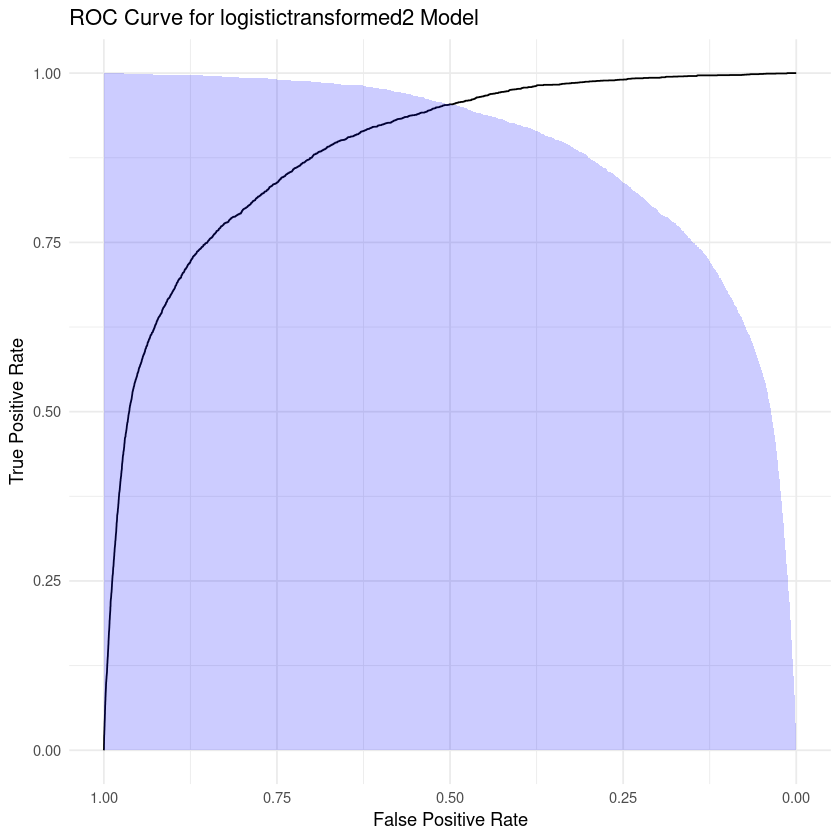

In [13]:

# Loading libraries
library(pROC)
library(ggplot2)

# Predicting probabilities
probs <- predict(logistictransformed2, testtransformed, type = "response")

# Creating ROC curve
roc_curve <- roc(testtransformed$HadHeartAttack, probs, levels = c("No", "Yes"))

# Ploting ROC curve with area under the curve filled in blue
ggroc(roc_curve) +
  labs(title = "ROC Curve for logistictransformed2 Model",
       x = "False Positive Rate",
       y = "True Positive Rate") +
  theme_minimal() +
  geom_area(aes(x = 1 - specificity, y = sensitivity), fill = "blue", alpha = 0.2)

## Model 3: Centered and Scaled Linear Discriminatory Analysis Using All Predictors
Assumptions: 
-Features are Normally Distributed
-Classes Share the Same Covariance Matrix
-Decision Boundary is Linear

In [14]:
ldaHeartAttack <- lda(HadHeartAttack~., data=traintransformed)
ldaHeartAttack


Call:
lda(HadHeartAttack ~ ., data = traintransformed)

Prior probabilities of groups:
        No        Yes 
0.94424706 0.05575294 

Group means:
      SexMale GeneralHealthFair GeneralHealthGood GeneralHealthVery good
No  0.4724799         0.1173576         0.3145218              0.3609351
Yes 0.6312271         0.2784128         0.3464524              0.1787794
    GeneralHealthExcellent AgeCategoryAge 25 to 29 AgeCategoryAge 30 to 34
No              0.17511635             0.048017725             0.056587316
Yes             0.04485659             0.003773992             0.006685357
    AgeCategoryAge 35 to 39 AgeCategoryAge 40 to 44 AgeCategoryAge 45 to 49
No               0.06608008              0.07107795              0.07025028
Yes              0.01196895              0.01692905              0.03051542
    AgeCategoryAge 50 to 54 AgeCategoryAge 55 to 59 AgeCategoryAge 60 to 64
No               0.08204142              0.09019081               0.1072154
Yes              0.05380634  

LDA & QDA Assumptions: Features are Normally Distributed 

Warning message in geom_bar(binwidth = 5, fill = "pink", color = "black", alpha = 0.7):
“Ignoring unknown parameters: `binwidth`”


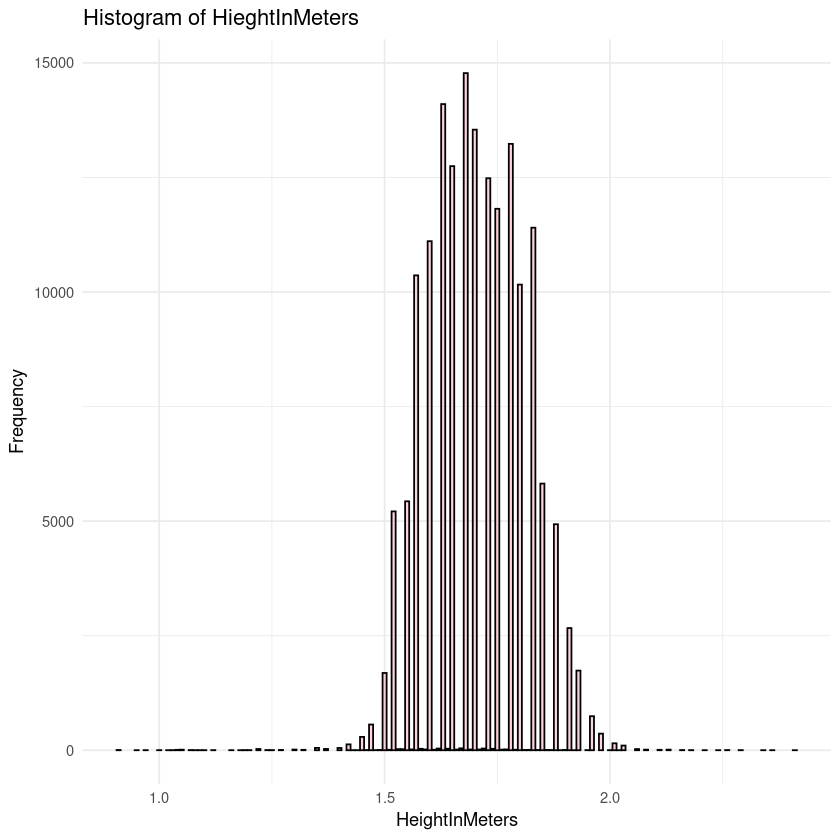

In [16]:
#bargraph of height in meters
ggplot(sampled_data, aes(x = HeightInMeters)) + 
    geom_bar(binwidth = 5, fill = "pink", color = "black", alpha = 0.7) + 
    labs(title = "Histogram of HieghtInMeters",y="Frequency") + 
    theme_minimal()

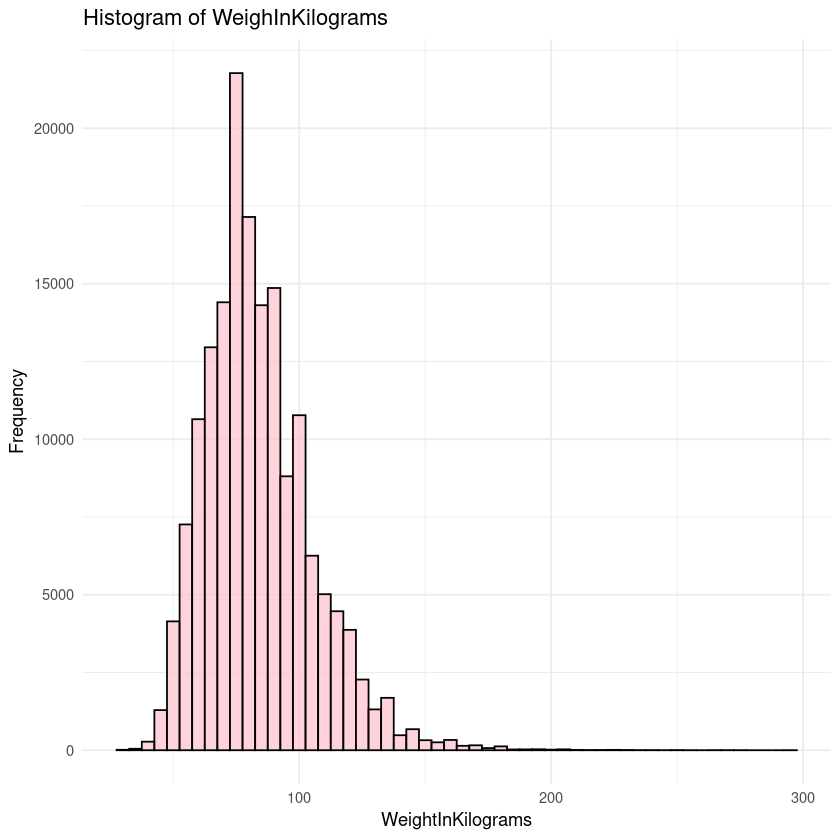

In [17]:
#Histograph of weight in kilograms
ggplot(sampled_data, aes(x = WeightInKilograms)) + 
    geom_histogram(binwidth = 5, fill = "pink", color = "black", alpha = 0.7) + 
    labs(title = "Histogram of WeighInKilograms",y="Frequency") + 
    theme_minimal()

Warning message in geom_bar(binwidth = 5, fill = "pink", color = "black", alpha = 0.7):
“Ignoring unknown parameters: `binwidth`”


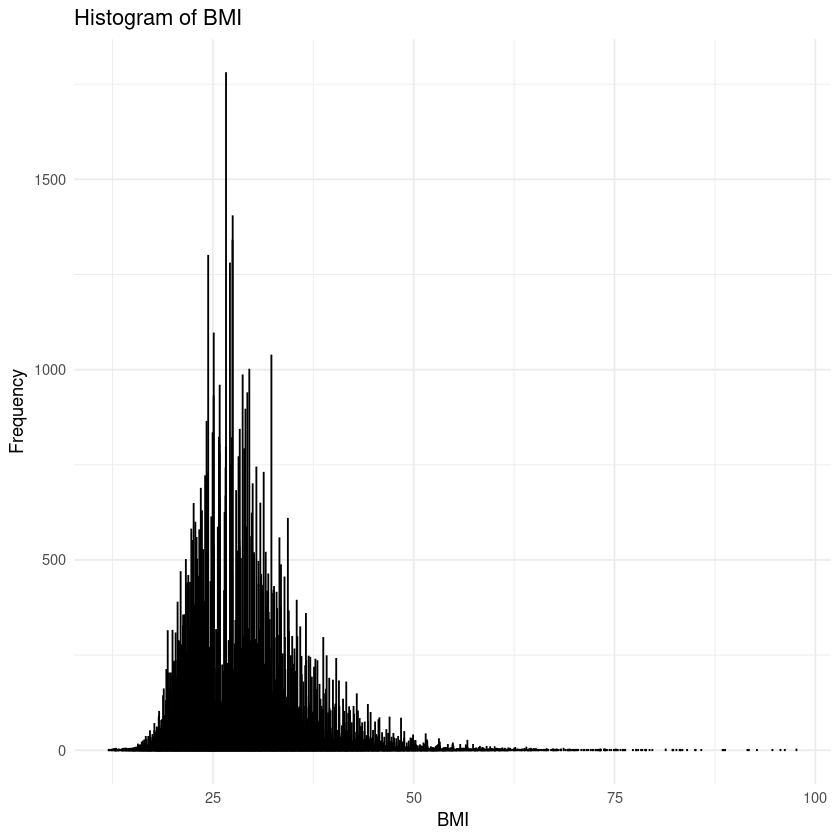

In [18]:
#histogram of BMI
ggplot(sampled_data, aes(x = BMI)) + 
    geom_bar(binwidth = 5, fill = "pink", color = "black", alpha = 0.7) + 
    labs(title = "Histogram of BMI",y="Frequency") + 
    theme_minimal()

Interpretation: Height is normally distributed. Weight and BMI look mostly normally distributed, with a slight skew to the right that is more aparent in the BMI graph. These may affect the accuracy of the LDA and QDA models.

In [19]:
#create lda model
ldaHeartAttack2 <- lda(HadHeartAttack ~. -HadAsthma-HeightInMeters-HighRiskLastYear-CovidPos-HadDepressiveDisorder-HadKidneyDisease-ECigaretteUsage-HadCOPD-HIVTesting-DifficultyDressingBathing-DifficultyWalking-DifficultyConcentrating-BMI-Region-RaceEthnicityCategory-AlcoholDrinkers-HadSkinCancer-DifficultyErrands, data = traintransformed)

ldaHeartAttack2



Call:
lda(HadHeartAttack ~ . - HadAsthma - HeightInMeters - HighRiskLastYear - 
    CovidPos - HadDepressiveDisorder - HadKidneyDisease - ECigaretteUsage - 
    HadCOPD - HIVTesting - DifficultyDressingBathing - DifficultyWalking - 
    DifficultyConcentrating - BMI - Region - RaceEthnicityCategory - 
    AlcoholDrinkers - HadSkinCancer - DifficultyErrands, data = traintransformed)

Prior probabilities of groups:
        No        Yes 
0.94424706 0.05575294 

Group means:
      SexMale GeneralHealthFair GeneralHealthGood GeneralHealthVery good
No  0.4724799         0.1173576         0.3145218              0.3609351
Yes 0.6312271         0.2784128         0.3464524              0.1787794
    GeneralHealthExcellent AgeCategoryAge 25 to 29 AgeCategoryAge 30 to 34
No              0.17511635             0.048017725             0.056587316
Yes             0.04485659             0.003773992             0.006685357
    AgeCategoryAge 35 to 39 AgeCategoryAge 40 to 44 AgeCategoryAge 45 to 49
No 

## Model 5: Centered and Scaled Quadratic Discriminatory Analysis Using All Predictors
Assumptions: 
-Features are Normally Distributed
-Classes Have Different Covariance Matrices
-Decision Boundary is Nonlinear

In [21]:
qdaHeartAttack <- qda(HadHeartAttack ~., data = traintransformed)
#qdaHeartAttack 

## Model 6: Centered and Scaled Quadratic Discriminatory Analysis Using Only Significant Logistic Predictors
Assumptions: 
-Features are Normally Distributed
-Classes Have Different Covariance Matrices
-Decision Boundary is Nonlinear

In [23]:
qdaHeartAttack2 <- qda(HadHeartAttack ~. -HadAsthma-HeightInMeters-HighRiskLastYear-CovidPos-HadDepressiveDisorder-HadKidneyDisease-ECigaretteUsage-HadCOPD-HIVTesting-DifficultyDressingBathing-DifficultyWalking-DifficultyConcentrating-BMI-Region-RaceEthnicityCategory-AlcoholDrinkers-HadSkinCancer-DifficultyErrands, data = traintransformed)

# Model Evaluation

Logistic Regression 1 (All Variables)

In [58]:
probs <- predict(logreg, testdata, type='response')
pred <- factor(ifelse(probs > 0.25, 1, 0),levels = c(0,1),labels = c("No", "Yes"))
head(pred)
confusion_matrix <- confusionMatrix(pred, testdata$HadHeartAttack, positive = 'Yes')
confusion_matrix

1  2  3  4  5  6 
No No No No No No 
Levels: No Yes

Confusion Matrix and Statistics

          Reference
Prediction    No   Yes
       No  65224  2091
       Yes  2138  1836
                                          
               Accuracy : 0.9407          
                 95% CI : (0.9389, 0.9424)
    No Information Rate : 0.9449          
    P-Value [Acc > NIR] : 1.0000          
                                          
                  Kappa : 0.4334          
                                          
 Mcnemar's Test P-Value : 0.4793          
                                          
            Sensitivity : 0.46753         
            Specificity : 0.96826         
         Pos Pred Value : 0.46200         
         Neg Pred Value : 0.96894         
             Prevalence : 0.05509         
         Detection Rate : 0.02575         
   Detection Prevalence : 0.05574         
      Balanced Accuracy : 0.71790         
                                          
       'Positive' Class : Yes             
                  

Interp: This model has a high accuracy and specificity, but a low sensitivity. It also requires all 33 predictor variables. 

Logistic Regression 2 (Significant Variables)

In [18]:
probs <- predict(steplogreg, testdata, type='response')
pred <- factor(ifelse(probs > 0.25, 1, 0),levels = c(0,1),labels = c("No", "Yes"))
head(pred)
confusion_matrix1 <- confusionMatrix(pred, testdata$HadHeartAttack, positive = 'Yes')
confusion_matrix1

1  2  3  4  5  6 
No No No No No No 
Levels: No Yes

Confusion Matrix and Statistics

          Reference
Prediction    No   Yes
       No  65224  2089
       Yes  2138  1838
                                          
               Accuracy : 0.9407          
                 95% CI : (0.9389, 0.9424)
    No Information Rate : 0.9449          
    P-Value [Acc > NIR] : 1.0000          
                                          
                  Kappa : 0.4338          
                                          
 Mcnemar's Test P-Value : 0.4603          
                                          
            Sensitivity : 0.46804         
            Specificity : 0.96826         
         Pos Pred Value : 0.46227         
         Neg Pred Value : 0.96897         
             Prevalence : 0.05509         
         Detection Rate : 0.02578         
   Detection Prevalence : 0.05577         
      Balanced Accuracy : 0.71815         
                                          
       'Positive' Class : Yes             
                  

Interp: This model has a high accuracy and specificity, but a low sensitivity. It also requires only 13 predictor variables, and provides an explaination of the relationships each variable has with heart attack odds.  

LDA 1 (All Variables)

In [15]:
predictions <- predict(ldaHeartAttack, testtransformed)
LDA <- confusionMatrix(predictions$class, testtransformed$HadHeartAttack, positive = "Yes")
LDA

Confusion Matrix and Statistics

          Reference
Prediction    No   Yes
       No  64961  1948
       Yes  2401  1979
                                          
               Accuracy : 0.939           
                 95% CI : (0.9372, 0.9407)
    No Information Rate : 0.9449          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.4442          
                                          
 Mcnemar's Test P-Value : 7.182e-12       
                                          
            Sensitivity : 0.50395         
            Specificity : 0.96436         
         Pos Pred Value : 0.45183         
         Neg Pred Value : 0.97089         
             Prevalence : 0.05509         
         Detection Rate : 0.02776         
   Detection Prevalence : 0.06144         
      Balanced Accuracy : 0.73415         
                                          
       'Positive' Class : Yes             
                  

Interp: This model has a high accuracy and specificity, but a low sensitivity. It also requires all 33 predictor variables, and provides little to no information about the relationships each variable has with heart attack odds.  

LDA 2 (Significant Variables)

In [20]:
predictions <- predict(ldaHeartAttack2, testtransformed)
LDA2 <- confusionMatrix(predictions$class, testtransformed$HadHeartAttack, positive = "Yes")
LDA2


Confusion Matrix and Statistics

          Reference
Prediction    No   Yes
       No  64964  1952
       Yes  2398  1975
                                          
               Accuracy : 0.939           
                 95% CI : (0.9372, 0.9407)
    No Information Rate : 0.9449          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.4436          
                                          
 Mcnemar's Test P-Value : 1.509e-11       
                                          
            Sensitivity : 0.50293         
            Specificity : 0.96440         
         Pos Pred Value : 0.45164         
         Neg Pred Value : 0.97083         
             Prevalence : 0.05509         
         Detection Rate : 0.02770         
   Detection Prevalence : 0.06134         
      Balanced Accuracy : 0.73366         
                                          
       'Positive' Class : Yes             
                  

Interp: This model has a high accuracy and specificity, but a low sensitivity. It also requires only 13 predictor variables, and provides little to no information about the relationships each variable has with heart attack odds.   

QDA 1 Confusion Matrix (All Variables)

In [22]:
predictions <- predict(qdaHeartAttack, testtransformed)
QDA <- confusionMatrix(predictions$class, testtransformed$HadHeartAttack, positive = "Yes")
QDA

Confusion Matrix and Statistics

          Reference
Prediction    No   Yes
       No  49278   718
       Yes 18084  3209
                                         
               Accuracy : 0.7363         
                 95% CI : (0.733, 0.7395)
    No Information Rate : 0.9449         
    P-Value [Acc > NIR] : 1              
                                         
                  Kappa : 0.178          
                                         
 Mcnemar's Test P-Value : <2e-16         
                                         
            Sensitivity : 0.81716        
            Specificity : 0.73154        
         Pos Pred Value : 0.15071        
         Neg Pred Value : 0.98564        
             Prevalence : 0.05509        
         Detection Rate : 0.04501        
   Detection Prevalence : 0.29869        
      Balanced Accuracy : 0.77435        
                                         
       'Positive' Class : Yes            
                                      

Interp: This model has a lower accuracy and  lower specificity, but a high sensitivity. It also requires all 33 predictor variables, and provides little to no information about the relationships each variable has with heart attack odds.   

QDA 2 Confusion Matrix (Significant Variables)

In [24]:
predictions2 <- predict(qdaHeartAttack2, testtransformed)
QDA2 <- confusionMatrix(predictions2$class, testtransformed$HadHeartAttack, positive = "Yes")
QDA2

Confusion Matrix and Statistics

          Reference
Prediction    No   Yes
       No  47871   621
       Yes 19491  3306
                                          
               Accuracy : 0.7179          
                 95% CI : (0.7146, 0.7212)
    No Information Rate : 0.9449          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.1694          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.84186         
            Specificity : 0.71065         
         Pos Pred Value : 0.14502         
         Neg Pred Value : 0.98719         
             Prevalence : 0.05509         
         Detection Rate : 0.04637         
   Detection Prevalence : 0.31978         
      Balanced Accuracy : 0.77626         
                                          
       'Positive' Class : Yes             
                  

Interp: This model has a lower accuracy and lower specificity, but a high sensitivity. It also only requires 13 predictor variables, and provides little to no information about the relationships each variable has with heart attack odds.   

# Final Model Selection

Model Selection: Our group chose the uncentered and unscaled logisitc regresison model as the strongest explanatory model. We used it to interpret the directional effect each predictor had on the odds of having a heart attack. Our strongest predictor model was the Centered and Scaled Quadratic Discriminatory Analysis model with Sex, General Health, Age, Weight, Angina, Stroke, Arthritis, Diabetes, Deaf or Hard of Hearing, Blind or Vision Dificulty, Flu, Pneumonia Vaccination, and Tetanus Vaccination as predictors. This model has more adaptable decision boundaries then the other models, and is therefore more flexible to the data. Since we found our numeric variables did not have linear relationships with the classification, the quadratic model was well suited for this dataset. Quadratic Discriminatory Analysis also requires more data than other models since it has more parameters to learn. The sufficient size of the data set allowed for this model to accurately predict without overfitting. This model resulted in an overall accuracy of 0.7179, a sensitivity of 0.84186, and a specificity of 0.71065. For this model, the most important measure of accuracy is the sensitivity, since it is the proportion of actual heart attacks that are correctly identified by the model. If a heart attack is misclassified as not predicted to take place, this may result in a life threatening situation for a patient. 

# Summary of Findings

Cardiovascular disease remains a leading cause of mortality worldwide, with heart attacks serving as a critical public health concern. Identifying individuals at heightened risk and understanding the contributing factors behind heart attacks could have profound implications for early prevention, medical interventions, and resource allocation. Contemporary healthcare datasets offer a wealth of patient-specific information, including demographic details, medical histories, and lifestyle indicators. By leveraging these datasets, we employed statistical machine learning models to better understand how various factors interplay to increase the likelihood of a heart attack. We found sex, general health, age, weight, angina, stroke, arthritis, diabetes, deaf or hard of hearing, blind or vision difficulty, flu, pnemonia vaccination, and tetanus vaccination were each significant predictors using Logistic Regression. We also created a strong Quadratic Descriminatory Analysis model for prediction that correctly identified 84% of heart attacks within the test set. This project demonstrated that using demographic, lifestyle, and medical history data can help predict an individual’s risk of experiencing a heart attack. By applying models such as logistic regression, linear discriminant analysis (LDA), and quadratic discriminant analysis (QDA), we identified several key factors that appear to influence heart attack risk. While our models achieved promising results in terms of classification accuracy and interpretability, there is still room for refinement and broader applicability. Moving forward, several steps can enhance both the utility and credibility of our findings. One important direction is to develop a more user-friendly, front-end interface. Such an interface would allow individuals, without deep technical or medical expertise, to input their health information and receive immediate insight into their potential risk level. This direct access could empower patients to take more proactive measures, such as seeking a cardiology consultation if their risk appears elevated. In addition, collaborating closely with healthcare professionals and domain experts can provide valuable context and validation. Cardiologists, clinical researchers, and epidemiologists can help interpret why these variables were found to be the most meaningful and advise how to incorporate domain-specific knowledge. Their expert feedback might illuminate additional factors that could be added such as blood pressure, resting heart rate, and others that may help capture the inaccuracies in our model. Lastly, continuously monitoring and refining the model after putting it into production are both key next steps. This moves us closer to a tool that can genuinely support patient empowerment, early intervention, and improved cardiovascular outcomes in everyday practice.
